In [1]:
import torch
torch.cuda.empty_cache() 

In [2]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
import urllib.request
from PIL import Image

In [3]:
import pandas as pd
import pyproj

In [4]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [5]:
from pathlib import Path

In [6]:
import joblib

In [7]:
from mt_function_yl import *

In [8]:
import seaborn as sn

In [9]:
from scipy import stats

In [10]:
from tabulate import tabulate

In [11]:
import statsmodels.api as sm

In [166]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import HDBSCAN
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

from sklearn import linear_model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn import svm

import seaborn as sn


# For regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import PredictionErrorDisplay

### Data loading

In [123]:
aa = pd.read_csv('/home/yelhe/script/mt/dataraw/dfaa.csv')

In [124]:
ttv = pd.read_csv('/home/yelhe/data/Traffic_network_variables/ttvariables_sum_updated0323.csv')

In [125]:
accident = aa[['Nr','SV','LV','pd']]

In [126]:
ttv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nr              350 non-null    int64  
 1   dbusl           350 non-null    float64
 2   dtraml          350 non-null    float64
 3   dtrainl         350 non-null    float64
 4   dplight         350 non-null    float64
 5   dstation        350 non-null    float64
 6   dparkcar        350 non-null    float64
 7   dparktw         350 non-null    float64
 8   dpedcro         350 non-null    float64
 9   dstopsign       350 non-null    float64
 10  dcurb           350 non-null    float64
 11  dgvm            350 non-null    float64
 12  gvm_dwv         350 non-null    int64  
 13  gvm_msp         350 non-null    int64  
 14  gvm_asp         350 non-null    int64  
 15  curbtype        350 non-null    int64  
 16  z_stznr         350 non-null    int64  
 17  z_qnr           350 non-null    int

In [127]:
tt_dist = ttv[['Nr', 
               'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar',
               'dparktw', 'dpedcro', 'dstopsign', 'dcurb', 'dtrafficarea', 'droad', 
               'droad_sl', 'dvfpath']]
tt_attr = ttv[['Nr',
               'gvm_dwv', 'gvm_msp', 'gvm_asp', 'curbtype', 'z_stznr', 'z_qnr',
               'z_knr', 'trafficarea', 'r_width', 'r_surface', 'speedlimit', 
               'bicyclecount', 'carcount']]

In [128]:
c1 = ['dbusl', 'dtraml', 'dtrainl', 'dplight', 
      'dstation', 'dparkcar', 'dparktw', 'dpedcro',
      'dstopsign', 'dcurb', 'dtrafficarea', 'droad', 
      'droad_sl', 'dvfpath']
c2 = ['gvm_dwv', 'gvm_msp', 'gvm_asp', 'curbtype',
      'z_stznr', 'z_qnr', 'z_knr', 'trafficarea',
      'r_width', 'r_surface', 'speedlimit', 'bicyclecount',
      'carcount']

### Distribution Check

Text(0.5, 1.0, 'dvfpath')

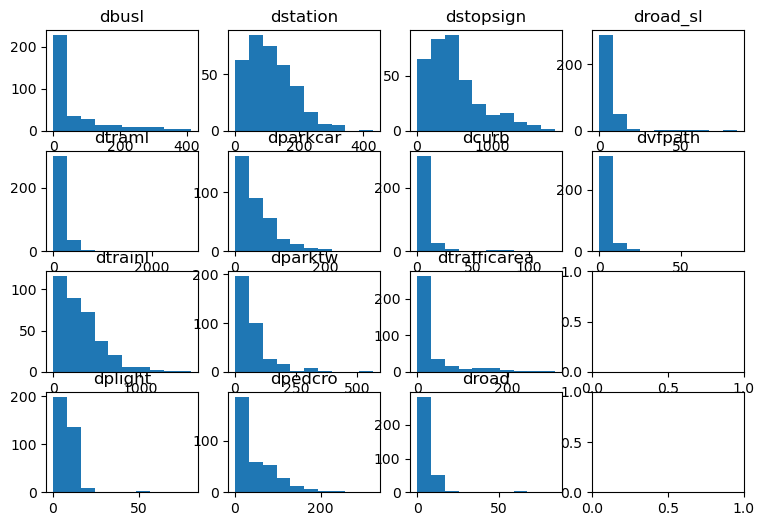

In [129]:
fig, axes = plt.subplots(ncols=4, nrows=4,
                         figsize=(3*3, 2*3))
axes[0,0].hist(tt_dist[c1[0]])
axes[0,0].set_title(c1[0])
axes[1,0].hist(tt_dist[c1[1]])
axes[1,0].set_title(c1[1])
axes[2,0].hist(tt_dist[c1[2]])
axes[2,0].set_title(c1[2])
axes[3,0].hist(tt_dist[c1[3]])
axes[3,0].set_title(c1[3])
axes[0,1].hist(tt_dist[c1[4]])
axes[0,1].set_title(c1[4])
axes[1,1].hist(tt_dist[c1[5]])
axes[1,1].set_title(c1[5])
axes[2,1].hist(tt_dist[c1[6]])
axes[2,1].set_title(c1[6])
axes[3,1].hist(tt_dist[c1[7]])
axes[3,1].set_title(c1[7])
axes[0,2].hist(tt_dist[c1[8]])
axes[0,2].set_title(c1[8])
axes[1,2].hist(tt_dist[c1[9]])
axes[1,2].set_title(c1[9])
axes[2,2].hist(tt_dist[c1[10]])
axes[2,2].set_title(c1[10])
axes[3,2].hist(tt_dist[c1[11]])
axes[3,2].set_title(c1[11])
axes[0,3].hist(tt_dist[c1[12]])
axes[0,3].set_title(c1[12])
axes[1,3].hist(tt_dist[c1[13]])
axes[1,3].set_title(c1[13])


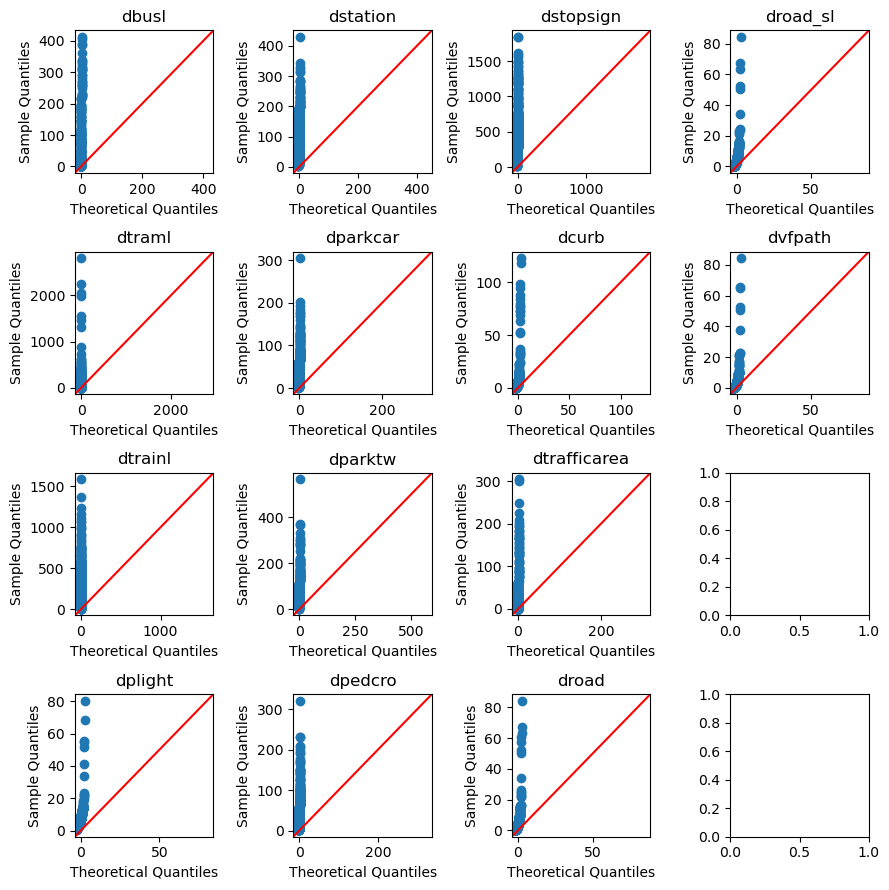

In [130]:
fig, axes = plt.subplots(ncols=4, nrows=4,
                         figsize=(3*3, 3*3))
sm.qqplot(tt_dist[c1[0]], line = '45', ax = axes[0,0])
axes[0,0].set_title(c1[0])
sm.qqplot(tt_dist[c1[1]], line = '45', ax = axes[1,0])
axes[1,0].set_title(c1[1])
sm.qqplot(tt_dist[c1[2]], line = '45', ax = axes[2,0])
axes[2,0].set_title(c1[2])
sm.qqplot(tt_dist[c1[3]], line = '45', ax = axes[3,0])
axes[3,0].set_title(c1[3])
sm.qqplot(tt_dist[c1[4]], line = '45', ax = axes[0,1])
axes[0,1].set_title(c1[4])
sm.qqplot(tt_dist[c1[5]], line = '45', ax = axes[1,1])
axes[1,1].set_title(c1[5])
sm.qqplot(tt_dist[c1[6]], line = '45', ax = axes[2,1])
axes[2,1].set_title(c1[6])
sm.qqplot(tt_dist[c1[7]], line = '45', ax = axes[3,1])
axes[3,1].set_title(c1[7])
sm.qqplot(tt_dist[c1[8]], line = '45', ax = axes[0,2])
axes[0,2].set_title(c1[8])
sm.qqplot(tt_dist[c1[9]], line = '45', ax = axes[1,2])
axes[1,2].set_title(c1[9])
sm.qqplot(tt_dist[c1[10]], line = '45', ax = axes[2,2])
axes[2,2].set_title(c1[10])
sm.qqplot(tt_dist[c1[11]], line = '45', ax = axes[3,2])
axes[3,2].set_title(c1[11])
sm.qqplot(tt_dist[c1[12]], line = '45', ax = axes[0,3])
axes[0,3].set_title(c1[12])
sm.qqplot(tt_dist[c1[13]], line = '45', ax = axes[1,3])
axes[1,3].set_title(c1[13])

plt.tight_layout()

In [131]:
res_0 = stats.normaltest(tt_dist[c1[0]])
res_1 = stats.normaltest(tt_dist[c1[1]])
res_2 = stats.normaltest(tt_dist[c1[2]])
res_3 = stats.normaltest(tt_dist[c1[3]])
res_4 = stats.normaltest(tt_dist[c1[4]])
res_5 = stats.normaltest(tt_dist[c1[5]])
res_6 = stats.normaltest(tt_dist[c1[6]])
res_7 = stats.normaltest(tt_dist[c1[7]])
res_8 = stats.normaltest(tt_dist[c1[8]])
res_9 = stats.normaltest(tt_dist[c1[9]])
res_10 = stats.normaltest(tt_dist[c1[10]])
res_11 = stats.normaltest(tt_dist[c1[11]])
res_12 = stats.normaltest(tt_dist[c1[12]])
res_13 = stats.normaltest(tt_dist[c1[13]])

In [132]:
print(c1[0], res_0.pvalue, '\n',
      c1[1], res_1.pvalue, '\n',
      c1[2], res_2.pvalue, '\n',
      c1[3], res_3.pvalue, '\n',
      c1[4], res_4.pvalue, '\n',
      c1[5], res_5.pvalue, '\n',
      c1[6], res_6.pvalue, '\n',
      c1[7], res_7.pvalue, '\n',
      c1[8], res_8.pvalue, '\n',
      c1[9], res_9.pvalue, '\n',
      c1[10], res_10.pvalue, '\n',
      c1[11], res_11.pvalue, '\n',
      c1[12], res_12.pvalue, '\n',
      c1[13], res_13.pvalue, '\n')

dbusl 1.2020328960509866e-29 
 dtraml 2.593298020888975e-88 
 dtrainl 5.33943308185956e-23 
 dplight 1.27312301391403e-86 
 dstation 1.3415521215647481e-09 
 dparkcar 2.6183005080168015e-31 
 dparktw 5.041867083315586e-48 
 dpedcro 2.0263501194494847e-28 
 dstopsign 3.7822510585965976e-15 
 dcurb 6.322733543545959e-73 
 dtrafficarea 3.54163531420676e-44 
 droad 1.9466534250335635e-82 
 droad_sl 6.328959960226583e-90 
 dvfpath 9.17162134173314e-95 



### Variables Transformation

In [133]:
tt_dist_log = tt_dist.copy(deep = True)
tt_dist_log[c1[0]] = np.log(tt_dist_log[c1[0]]).replace(-np.inf, 0)
tt_dist_log[c1[1]] = np.log(tt_dist_log[c1[1]]).replace(-np.inf, 0)
tt_dist_log[c1[2]] = np.log(tt_dist_log[c1[2]]).replace(-np.inf, 0)
tt_dist_log[c1[3]] = np.log(tt_dist_log[c1[3]]).replace(-np.inf, 0)
tt_dist_log[c1[4]] = np.log(tt_dist_log[c1[4]]).replace(-np.inf, 0)
tt_dist_log[c1[5]] = np.log(tt_dist_log[c1[5]]).replace(-np.inf, 0)
tt_dist_log[c1[6]] = np.log(tt_dist_log[c1[6]]).replace(-np.inf, 0)
tt_dist_log[c1[7]] = np.log(tt_dist_log[c1[7]]).replace(-np.inf, 0)
tt_dist_log[c1[8]] = np.log(tt_dist_log[c1[8]]).replace(-np.inf, 0)
tt_dist_log[c1[9]] = np.log(tt_dist_log[c1[9]]).replace(-np.inf, 0)
tt_dist_log[c1[10]] = np.log(tt_dist_log[c1[10]]).replace(-np.inf, 0)
tt_dist_log[c1[11]] = np.log(tt_dist_log[c1[11]]).replace(-np.inf, 0)
tt_dist_log[c1[12]] = np.log(tt_dist_log[c1[12]]).replace(-np.inf, 0)
tt_dist_log[c1[13]] = np.log(tt_dist_log[c1[13]]).replace(-np.inf, 0)

/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'dvfpath')

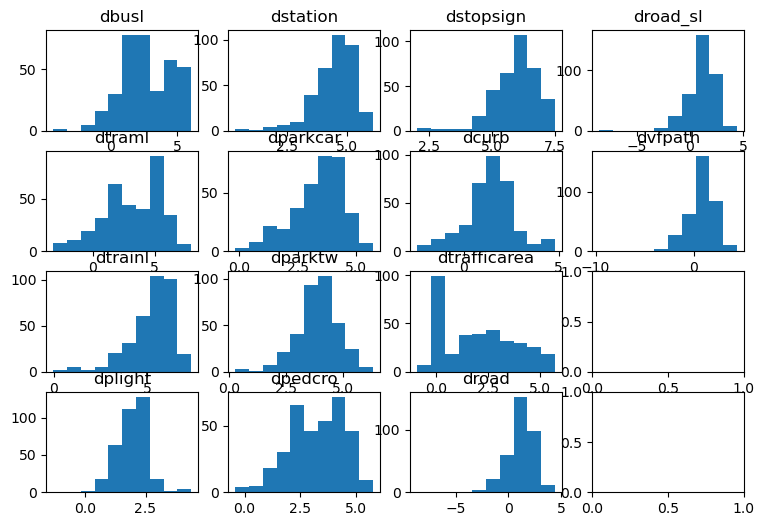

In [134]:
fig, axes = plt.subplots(ncols=4, nrows=4,
                         figsize=(3*3, 2*3))
axes[0,0].hist(tt_dist_log[c1[0]])
axes[0,0].set_title(c1[0])
axes[1,0].hist(tt_dist_log[c1[1]])
axes[1,0].set_title(c1[1])
axes[2,0].hist(tt_dist_log[c1[2]])
axes[2,0].set_title(c1[2])
axes[3,0].hist(tt_dist_log[c1[3]])
axes[3,0].set_title(c1[3])
axes[0,1].hist(tt_dist_log[c1[4]])
axes[0,1].set_title(c1[4])
axes[1,1].hist(tt_dist_log[c1[5]])
axes[1,1].set_title(c1[5])
axes[2,1].hist(tt_dist_log[c1[6]])
axes[2,1].set_title(c1[6])
axes[3,1].hist(tt_dist_log[c1[7]])
axes[3,1].set_title(c1[7])
axes[0,2].hist(tt_dist_log[c1[8]])
axes[0,2].set_title(c1[8])
axes[1,2].hist(tt_dist_log[c1[9]])
axes[1,2].set_title(c1[9])
axes[2,2].hist(tt_dist_log[c1[10]])
axes[2,2].set_title(c1[10])
axes[3,2].hist(tt_dist_log[c1[11]])
axes[3,2].set_title(c1[11])
axes[0,3].hist(tt_dist_log[c1[12]])
axes[0,3].set_title(c1[12])
axes[1,3].hist(tt_dist_log[c1[13]])
axes[1,3].set_title(c1[13])


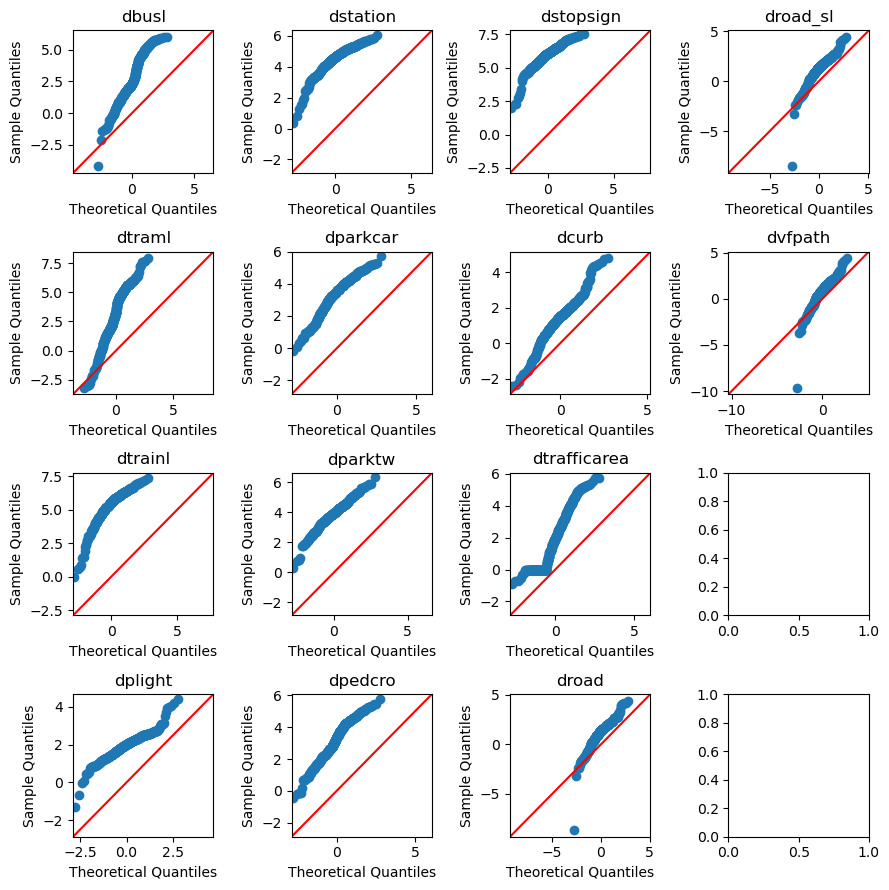

In [135]:
fig, axes = plt.subplots(ncols=4, nrows=4,
                         figsize=(3*3, 3*3))
sm.qqplot(tt_dist_log[c1[0]], line = '45', ax = axes[0,0])
axes[0,0].set_title(c1[0])
sm.qqplot(tt_dist_log[c1[1]], line = '45', ax = axes[1,0])
axes[1,0].set_title(c1[1])
sm.qqplot(tt_dist_log[c1[2]], line = '45', ax = axes[2,0])
axes[2,0].set_title(c1[2])
sm.qqplot(tt_dist_log[c1[3]], line = '45', ax = axes[3,0])
axes[3,0].set_title(c1[3])
sm.qqplot(tt_dist_log[c1[4]], line = '45', ax = axes[0,1])
axes[0,1].set_title(c1[4])
sm.qqplot(tt_dist_log[c1[5]], line = '45', ax = axes[1,1])
axes[1,1].set_title(c1[5])
sm.qqplot(tt_dist_log[c1[6]], line = '45', ax = axes[2,1])
axes[2,1].set_title(c1[6])
sm.qqplot(tt_dist_log[c1[7]], line = '45', ax = axes[3,1])
axes[3,1].set_title(c1[7])
sm.qqplot(tt_dist_log[c1[8]], line = '45', ax = axes[0,2])
axes[0,2].set_title(c1[8])
sm.qqplot(tt_dist_log[c1[9]], line = '45', ax = axes[1,2])
axes[1,2].set_title(c1[9])
sm.qqplot(tt_dist_log[c1[10]], line = '45', ax = axes[2,2])
axes[2,2].set_title(c1[10])
sm.qqplot(tt_dist_log[c1[11]], line = '45', ax = axes[3,2])
axes[3,2].set_title(c1[11])
sm.qqplot(tt_dist_log[c1[12]], line = '45', ax = axes[0,3])
axes[0,3].set_title(c1[12])
sm.qqplot(tt_dist_log[c1[13]], line = '45', ax = axes[1,3])
axes[1,3].set_title(c1[13])
plt.tight_layout()

In [136]:
lres_0 = stats.normaltest(tt_dist_log[c1[0]])
lres_1 = stats.normaltest(tt_dist_log[c1[1]])
lres_2 = stats.normaltest(tt_dist_log[c1[2]])
lres_3 = stats.normaltest(tt_dist_log[c1[3]])
lres_4 = stats.normaltest(tt_dist_log[c1[4]])
lres_5 = stats.normaltest(tt_dist_log[c1[5]])
lres_6 = stats.normaltest(tt_dist_log[c1[6]])
lres_7 = stats.normaltest(tt_dist_log[c1[7]])
lres_8 = stats.normaltest(tt_dist_log[c1[8]])
lres_9 = stats.normaltest(tt_dist_log[c1[9]])
lres_10 = stats.normaltest(tt_dist_log[c1[10]])
lres_11 = stats.normaltest(tt_dist_log[c1[11]])
lres_12 = stats.normaltest(tt_dist_log[c1[12]])
lres_13 = stats.normaltest(tt_dist_log[c1[13]])

In [137]:
print(c1[0], lres_0.pvalue, '\n',
      c1[1], lres_1.pvalue, '\n',
      c1[2], lres_2.pvalue, '\n',
      c1[3], lres_3.pvalue, '\n',
      c1[4], lres_4.pvalue, '\n',
      c1[5], lres_5.pvalue, '\n',
      c1[6], lres_6.pvalue, '\n',
      c1[7], lres_7.pvalue, '\n',
      c1[8], lres_8.pvalue, '\n',
      c1[9], lres_9.pvalue, '\n',
      c1[10], lres_10.pvalue, '\n',
      c1[11], lres_11.pvalue, '\n',
      c1[12], lres_12.pvalue, '\n',
      c1[13], lres_13.pvalue, '\n')

dbusl 0.045994850959473046 
 dtraml 0.00020430041448337246 
 dtrainl 8.527945188590559e-23 
 dplight 1.670897809740079e-08 
 dstation 1.366035165602116e-21 
 dparkcar 2.1011903496977946e-06 
 dparktw 2.3017085581361872e-05 
 dpedcro 0.0009663063413348835 
 dstopsign 2.0751880117515198e-19 
 dcurb 0.00827802762527894 
 dtrafficarea 5.7349756060568476e-34 
 droad 2.4739619368424195e-32 
 droad_sl 1.4181294965928802e-33 
 dvfpath 1.920415294137469e-30 



In [138]:
# Yeojohnson Transformation

In [139]:
tt_dist_yj = tt_dist.copy(deep = True)
tt_dist_yj[c1[0]], l0  = stats.yeojohnson(tt_dist_yj[c1[0]])
tt_dist_yj[c1[1]], l1  = stats.yeojohnson(tt_dist_yj[c1[1]])
tt_dist_yj[c1[2]], l2  = stats.yeojohnson(tt_dist_yj[c1[2]])
tt_dist_yj[c1[3]], l3  = stats.yeojohnson(tt_dist_yj[c1[3]])
tt_dist_yj[c1[4]], l4  = stats.yeojohnson(tt_dist_yj[c1[4]])
tt_dist_yj[c1[5]], l5  = stats.yeojohnson(tt_dist_yj[c1[5]])
tt_dist_yj[c1[6]], l6  = stats.yeojohnson(tt_dist_yj[c1[6]])
tt_dist_yj[c1[7]], l7  = stats.yeojohnson(tt_dist_yj[c1[7]])
tt_dist_yj[c1[8]], l8  = stats.yeojohnson(tt_dist_yj[c1[8]])
tt_dist_yj[c1[9]], l9  = stats.yeojohnson(tt_dist_yj[c1[9]])
tt_dist_yj[c1[10]], l10  = stats.yeojohnson(tt_dist_yj[c1[10]])
tt_dist_yj[c1[11]], l11  = stats.yeojohnson(tt_dist_yj[c1[11]])
tt_dist_yj[c1[12]], l12  = stats.yeojohnson(tt_dist_yj[c1[12]])
tt_dist_yj[c1[13]], l13  = stats.yeojohnson(tt_dist_yj[c1[13]])

Text(0.5, 1.0, 'dvfpath')

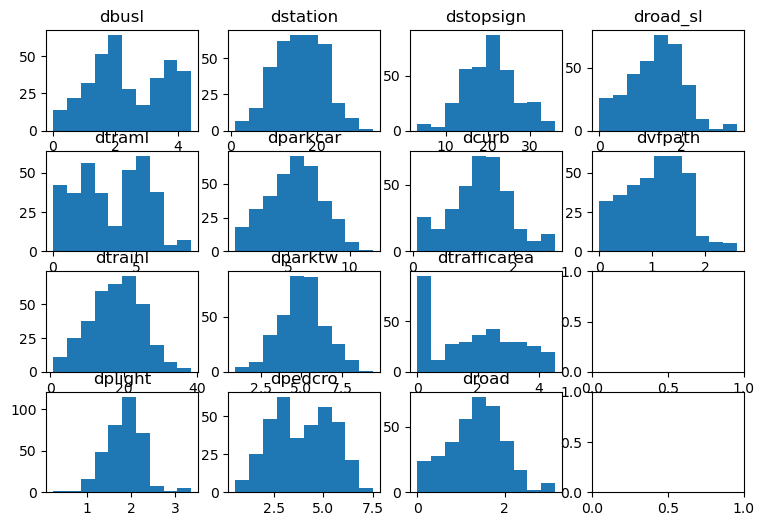

In [140]:
fig, axes = plt.subplots(ncols=4, nrows=4,
                         figsize=(3*3, 2*3))
axes[0,0].hist(tt_dist_yj[c1[0]])
axes[0,0].set_title(c1[0])
axes[1,0].hist(tt_dist_yj[c1[1]])
axes[1,0].set_title(c1[1])
axes[2,0].hist(tt_dist_yj[c1[2]])
axes[2,0].set_title(c1[2])
axes[3,0].hist(tt_dist_yj[c1[3]])
axes[3,0].set_title(c1[3])
axes[0,1].hist(tt_dist_yj[c1[4]])
axes[0,1].set_title(c1[4])
axes[1,1].hist(tt_dist_yj[c1[5]])
axes[1,1].set_title(c1[5])
axes[2,1].hist(tt_dist_yj[c1[6]])
axes[2,1].set_title(c1[6])
axes[3,1].hist(tt_dist_yj[c1[7]])
axes[3,1].set_title(c1[7])
axes[0,2].hist(tt_dist_yj[c1[8]])
axes[0,2].set_title(c1[8])
axes[1,2].hist(tt_dist_yj[c1[9]])
axes[1,2].set_title(c1[9])
axes[2,2].hist(tt_dist_yj[c1[10]])
axes[2,2].set_title(c1[10])
axes[3,2].hist(tt_dist_yj[c1[11]])
axes[3,2].set_title(c1[11])
axes[0,3].hist(tt_dist_yj[c1[12]])
axes[0,3].set_title(c1[12])
axes[1,3].hist(tt_dist_yj[c1[13]])
axes[1,3].set_title(c1[13])


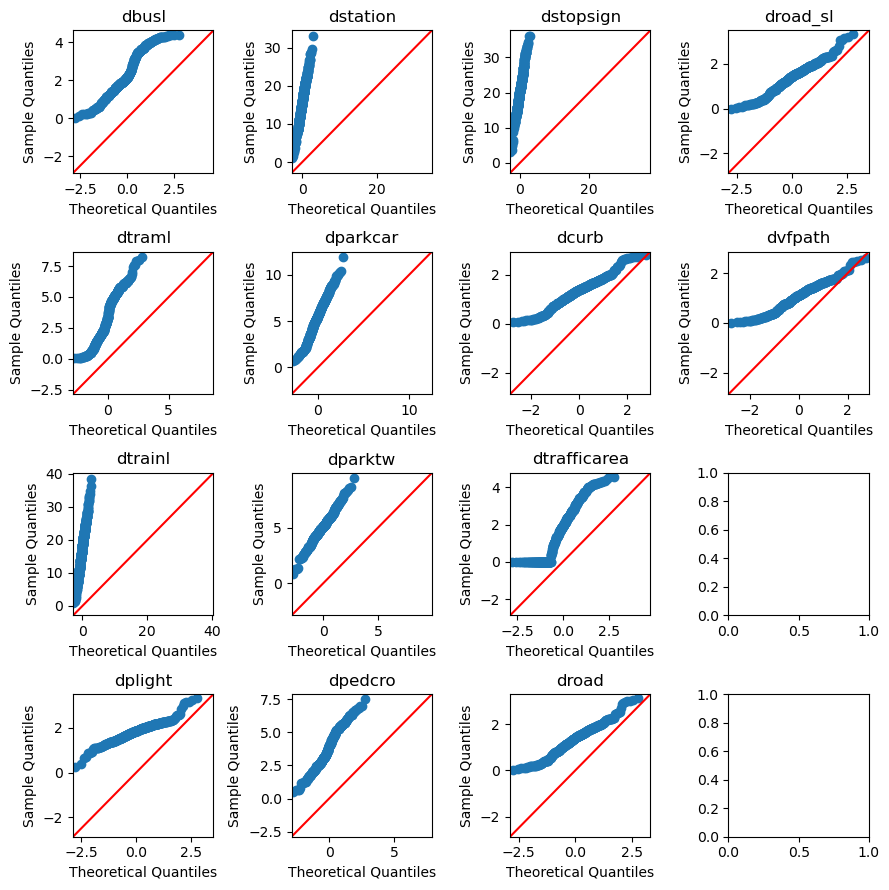

In [141]:
fig, axes = plt.subplots(ncols=4, nrows=4,
                         figsize=(3*3, 3*3))
sm.qqplot(tt_dist_yj[c1[0]], line = '45', ax = axes[0,0])
axes[0,0].set_title(c1[0])
sm.qqplot(tt_dist_yj[c1[1]], line = '45', ax = axes[1,0])
axes[1,0].set_title(c1[1])
sm.qqplot(tt_dist_yj[c1[2]], line = '45', ax = axes[2,0])
axes[2,0].set_title(c1[2])
sm.qqplot(tt_dist_yj[c1[3]], line = '45', ax = axes[3,0])
axes[3,0].set_title(c1[3])
sm.qqplot(tt_dist_yj[c1[4]], line = '45', ax = axes[0,1])
axes[0,1].set_title(c1[4])
sm.qqplot(tt_dist_yj[c1[5]], line = '45', ax = axes[1,1])
axes[1,1].set_title(c1[5])
sm.qqplot(tt_dist_yj[c1[6]], line = '45', ax = axes[2,1])
axes[2,1].set_title(c1[6])
sm.qqplot(tt_dist_yj[c1[7]], line = '45', ax = axes[3,1])
axes[3,1].set_title(c1[7])
sm.qqplot(tt_dist_yj[c1[8]], line = '45', ax = axes[0,2])
axes[0,2].set_title(c1[8])
sm.qqplot(tt_dist_yj[c1[9]], line = '45', ax = axes[1,2])
axes[1,2].set_title(c1[9])
sm.qqplot(tt_dist_yj[c1[10]], line = '45', ax = axes[2,2])
axes[2,2].set_title(c1[10])
sm.qqplot(tt_dist_yj[c1[11]], line = '45', ax = axes[3,2])
axes[3,2].set_title(c1[11])
sm.qqplot(tt_dist_yj[c1[12]], line = '45', ax = axes[0,3])
axes[0,3].set_title(c1[12])
sm.qqplot(tt_dist_yj[c1[13]], line = '45', ax = axes[1,3])
axes[1,3].set_title(c1[13])
plt.tight_layout()

In [142]:
yjres_0 = stats.normaltest(tt_dist_yj[c1[0]])
yjres_1 = stats.normaltest(tt_dist_yj[c1[1]])
yjres_2 = stats.normaltest(tt_dist_yj[c1[2]])
yjres_3 = stats.normaltest(tt_dist_yj[c1[3]])
yjres_4 = stats.normaltest(tt_dist_yj[c1[4]])
yjres_5 = stats.normaltest(tt_dist_yj[c1[5]])
yjres_6 = stats.normaltest(tt_dist_yj[c1[6]])
yjres_7 = stats.normaltest(tt_dist_yj[c1[7]])
yjres_8 = stats.normaltest(tt_dist_yj[c1[8]])
yjres_9 = stats.normaltest(tt_dist_yj[c1[9]])
yjres_10 = stats.normaltest(tt_dist_yj[c1[10]])
yjres_11 = stats.normaltest(tt_dist_yj[c1[11]])
yjres_12 = stats.normaltest(tt_dist_yj[c1[12]])
yjres_13 = stats.normaltest(tt_dist_yj[c1[13]])

In [143]:
print(c1[0], yjres_0.pvalue, '\n',
      c1[1], yjres_1.pvalue, '\n',
      c1[2], yjres_2.pvalue, '\n',
      c1[3], yjres_3.pvalue, '\n',
      c1[4], yjres_4.pvalue, '\n',
      c1[5], yjres_5.pvalue, '\n',
      c1[6], yjres_6.pvalue, '\n',
      c1[7], yjres_7.pvalue, '\n',
      c1[8], yjres_8.pvalue, '\n',
      c1[9], yjres_9.pvalue, '\n',
      c1[10], yjres_10.pvalue, '\n',
      c1[11], yjres_11.pvalue, '\n',
      c1[12], yjres_12.pvalue, '\n',
      c1[13], yjres_13.pvalue, '\n')

dbusl 1.6163813810975464e-30 
 dtraml 1.770001186228528e-33 
 dtrainl 0.5034730281244644 
 dplight 0.0005242452639216105 
 dstation 0.29886627750503636 
 dparkcar 0.03890483943918012 
 dparktw 0.6683427979712476 
 dpedcro 6.831526084563053e-12 
 dstopsign 0.9901593390320329 
 dcurb 0.9987496387153637 
 dtrafficarea 6.920101113189877e-58 
 droad 0.7312868268692821 
 droad_sl 0.8184919537735965 
 dvfpath 0.036976699173602745 



### Variables Standardization

In [144]:
from sklearn.preprocessing import StandardScaler

In [145]:
tt_dist_st = tt_dist_yj.copy(deep = True)
tt_dist_st[c1[0]]  = stats.zscore(tt_dist_st[c1[0]])
tt_dist_st[c1[1]]  = stats.zscore(tt_dist_st[c1[1]])
tt_dist_st[c1[2]]  = stats.zscore(tt_dist_st[c1[2]])
tt_dist_st[c1[3]]  = stats.zscore(tt_dist_st[c1[3]])
tt_dist_st[c1[4]]  = stats.zscore(tt_dist_st[c1[4]])
tt_dist_st[c1[5]]  = stats.zscore(tt_dist_st[c1[5]])
tt_dist_st[c1[6]]  = stats.zscore(tt_dist_st[c1[6]])
tt_dist_st[c1[7]]  = stats.zscore(tt_dist_st[c1[7]])
tt_dist_st[c1[8]]  = stats.zscore(tt_dist_st[c1[8]])
tt_dist_st[c1[9]]  = stats.zscore(tt_dist_st[c1[9]])
tt_dist_st[c1[10]]  = stats.zscore(tt_dist_st[c1[10]])
tt_dist_st[c1[11]]  = stats.zscore(tt_dist_st[c1[11]])
tt_dist_st[c1[12]]  = stats.zscore(tt_dist_st[c1[12]])
tt_dist_st[c1[13]]  = stats.zscore(tt_dist_st[c1[13]])

Text(0.5, 1.0, 'dvfpath')

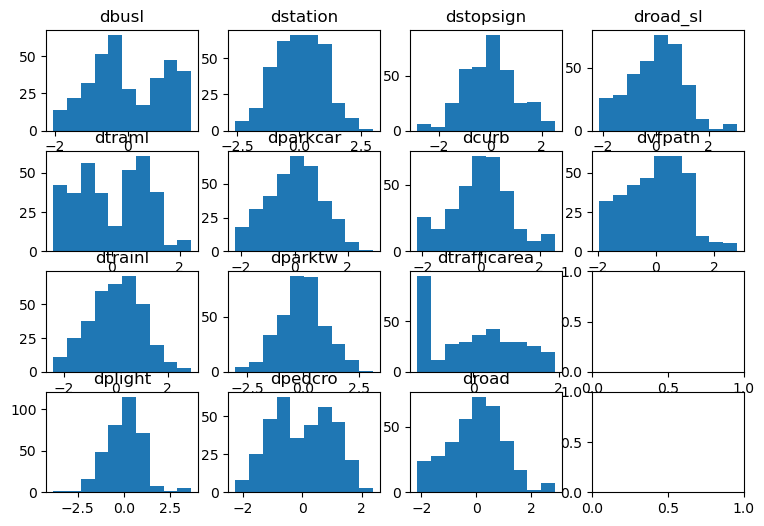

In [146]:
fig, axes = plt.subplots(ncols=4, nrows=4,
                         figsize=(3*3, 2*3))
axes[0,0].hist(tt_dist_st[c1[0]])
axes[0,0].set_title(c1[0])
axes[1,0].hist(tt_dist_st[c1[1]])
axes[1,0].set_title(c1[1])
axes[2,0].hist(tt_dist_st[c1[2]])
axes[2,0].set_title(c1[2])
axes[3,0].hist(tt_dist_st[c1[3]])
axes[3,0].set_title(c1[3])
axes[0,1].hist(tt_dist_st[c1[4]])
axes[0,1].set_title(c1[4])
axes[1,1].hist(tt_dist_st[c1[5]])
axes[1,1].set_title(c1[5])
axes[2,1].hist(tt_dist_st[c1[6]])
axes[2,1].set_title(c1[6])
axes[3,1].hist(tt_dist_st[c1[7]])
axes[3,1].set_title(c1[7])
axes[0,2].hist(tt_dist_st[c1[8]])
axes[0,2].set_title(c1[8])
axes[1,2].hist(tt_dist_st[c1[9]])
axes[1,2].set_title(c1[9])
axes[2,2].hist(tt_dist_st[c1[10]])
axes[2,2].set_title(c1[10])
axes[3,2].hist(tt_dist_st[c1[11]])
axes[3,2].set_title(c1[11])
axes[0,3].hist(tt_dist_st[c1[12]])
axes[0,3].set_title(c1[12])
axes[1,3].hist(tt_dist_st[c1[13]])
axes[1,3].set_title(c1[13])


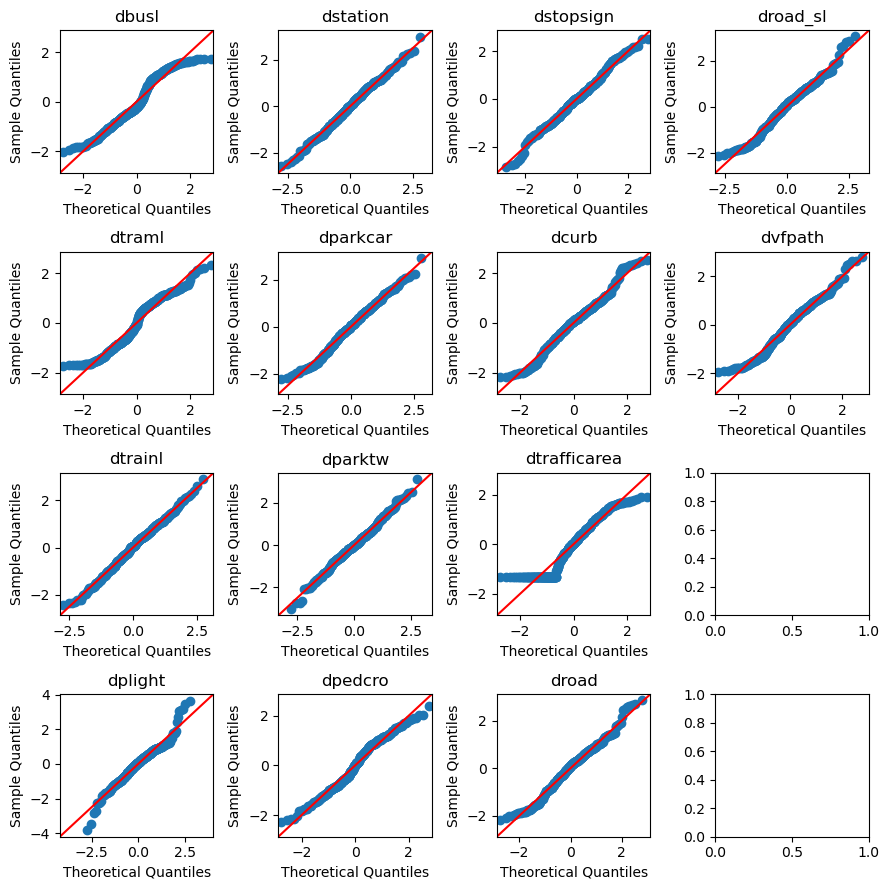

In [147]:
fig, axes = plt.subplots(ncols=4, nrows=4,
                         figsize=(3*3, 3*3))
sm.qqplot(tt_dist_st[c1[0]], line = '45', ax = axes[0,0])
axes[0,0].set_title(c1[0])
sm.qqplot(tt_dist_st[c1[1]], line = '45', ax = axes[1,0])
axes[1,0].set_title(c1[1])
sm.qqplot(tt_dist_st[c1[2]], line = '45', ax = axes[2,0])
axes[2,0].set_title(c1[2])
sm.qqplot(tt_dist_st[c1[3]], line = '45', ax = axes[3,0])
axes[3,0].set_title(c1[3])
sm.qqplot(tt_dist_st[c1[4]], line = '45', ax = axes[0,1])
axes[0,1].set_title(c1[4])
sm.qqplot(tt_dist_st[c1[5]], line = '45', ax = axes[1,1])
axes[1,1].set_title(c1[5])
sm.qqplot(tt_dist_st[c1[6]], line = '45', ax = axes[2,1])
axes[2,1].set_title(c1[6])
sm.qqplot(tt_dist_st[c1[7]], line = '45', ax = axes[3,1])
axes[3,1].set_title(c1[7])
sm.qqplot(tt_dist_st[c1[8]], line = '45', ax = axes[0,2])
axes[0,2].set_title(c1[8])
sm.qqplot(tt_dist_st[c1[9]], line = '45', ax = axes[1,2])
axes[1,2].set_title(c1[9])
sm.qqplot(tt_dist_st[c1[10]], line = '45', ax = axes[2,2])
axes[2,2].set_title(c1[10])
sm.qqplot(tt_dist_st[c1[11]], line = '45', ax = axes[3,2])
axes[3,2].set_title(c1[11])
sm.qqplot(tt_dist_st[c1[12]], line = '45', ax = axes[0,3])
axes[0,3].set_title(c1[12])
sm.qqplot(tt_dist_st[c1[13]], line = '45', ax = axes[1,3])
axes[1,3].set_title(c1[13])
plt.tight_layout()

In [148]:
stres_0 = stats.normaltest(tt_dist_st[c1[0]])
stres_1 = stats.normaltest(tt_dist_st[c1[1]])
stres_2 = stats.normaltest(tt_dist_st[c1[2]])
stres_3 = stats.normaltest(tt_dist_st[c1[3]])
stres_4 = stats.normaltest(tt_dist_st[c1[4]])
stres_5 = stats.normaltest(tt_dist_st[c1[5]])
stres_6 = stats.normaltest(tt_dist_st[c1[6]])
stres_7 = stats.normaltest(tt_dist_st[c1[7]])
stres_8 = stats.normaltest(tt_dist_st[c1[8]])
stres_9 = stats.normaltest(tt_dist_st[c1[9]])
stres_10 = stats.normaltest(tt_dist_st[c1[10]])
stres_11 = stats.normaltest(tt_dist_st[c1[11]])
stres_12 = stats.normaltest(tt_dist_st[c1[12]])
stres_13 = stats.normaltest(tt_dist_st[c1[13]])

In [149]:
print(c1[0], stres_0.pvalue, '\n',
      c1[1], stres_1.pvalue, '\n',
      c1[2], stres_2.pvalue, '\n',
      c1[3], stres_3.pvalue, '\n',
      c1[4], stres_4.pvalue, '\n',
      c1[5], stres_5.pvalue, '\n',
      c1[6], stres_6.pvalue, '\n',
      c1[7], stres_7.pvalue, '\n',
      c1[8], stres_8.pvalue, '\n',
      c1[9], stres_9.pvalue, '\n',
      c1[10], stres_10.pvalue, '\n',
      c1[11], stres_11.pvalue, '\n',
      c1[12], stres_12.pvalue, '\n',
      c1[13], stres_13.pvalue, '\n')

dbusl 1.6163813810980814e-30 
 dtraml 1.7700011862293435e-33 
 dtrainl 0.5034730281244642 
 dplight 0.0005242452639216093 
 dstation 0.29886627750503614 
 dparkcar 0.03890483943918084 
 dparktw 0.668342797971251 
 dpedcro 6.831526084563053e-12 
 dstopsign 0.9901593390320325 
 dcurb 0.9987496387153636 
 dtrafficarea 6.920101113185517e-58 
 droad 0.7312868268692777 
 droad_sl 0.8184919537735965 
 dvfpath 0.036976699173602745 



In [150]:
tt_dist_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Nr            350 non-null    int64  
 1   dbusl         350 non-null    float64
 2   dtraml        350 non-null    float64
 3   dtrainl       350 non-null    float64
 4   dplight       350 non-null    float64
 5   dstation      350 non-null    float64
 6   dparkcar      350 non-null    float64
 7   dparktw       350 non-null    float64
 8   dpedcro       350 non-null    float64
 9   dstopsign     350 non-null    float64
 10  dcurb         350 non-null    float64
 11  dtrafficarea  350 non-null    float64
 12  droad         350 non-null    float64
 13  droad_sl      350 non-null    float64
 14  dvfpath       350 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 41.1 KB


In [151]:
# Distance variables after normalization and standardization
tt_dist_st.to_csv('/home/yelhe/data/Traffic_network_variables/ttvariables_distance_norm_stand.csv', index = False)

### Regression

In [154]:
acc_ttdist = accident.merge(tt_dist_st, on = ['Nr'])

In [155]:
acc_ttdist

,Nr,SV,LV,pd,dbusl,dtraml,dtrainl,dplight,dstation,dparkcar,dparktw,dpedcro,dstopsign,dcurb,dtrafficarea,droad,droad_sl,dvfpath
0,99900060852597,0,1,15,0.396257,-0.119860,-0.760942,-0.995660,-1.408004,0.055068,1.600021,-0.987361,0.734418,-1.752466,-0.608660,-0.604692,-0.605390,-1.354771
1,99900063018611,1,0,0,-0.145889,1.382238,2.895791,-1.546878,-0.900337,1.119018,2.329570,0.922575,-1.919746,0.947033,1.112913,-1.343002,-1.346949,-1.385904
2,99900052723510,0,1,500,0.945795,0.724999,0.122800,0.411885,0.995345,-0.883092,0.484260,0.794847,0.638917,0.115940,-1.305449,0.263594,0.281910,0.589023
3,99900061514043,0,1,3000,-1.042366,0.598061,0.614803,0.418928,0.351359,-1.739233,1.329958,1.178437,1.494014,-0.812266,1.183275,-0.699602,-0.701314,-0.544839
4,99900063037843,1,0,200,0.635555,0.771691,2.595377,0.994665,0.760592,-1.135387,1.086626,1.392251,-0.210295,0.242780,-1.305449,0.399712,0.422626,0.718931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,99900055905276,0,1,0,-0.144309,-1.155351,1.791947,-2.834315,0.019810,0.743195,2.500649,0.390256,1.093929,0.889006,-0.795319,1.115097,1.170118,1.376359
346,99900060670975,0,1,200,1.332145,0.844334,1.432348,-0.074568,0.928721,-1.000687,1.722981,-1.116375,0.620443,-0.193214,-1.305449,-0.063878,-0.054782,0.270681
347,99900047367168,0,3,4400,1.548064,-0.779092,1.261430,0.061233,-1.308186,2.195033,1.318132,1.744954,-0.200431,0.644934,1.051605,0.837090,0.878001,0.598701
348,99900050714619,1,0,0,1.239789,0.737543,0.704704,-0.233468,0.596602,-1.377652,0.317766,1.521424,0.548412,-0.178218,-1.305449,-0.063049,-0.053930,0.270327


In [196]:
# 0 1 for severity
acc_ttdist = acc_ttdist.assign(svp = 1)
acc_ttdist = acc_ttdist.assign(lvp = 1)
acc_ttdist = acc_ttdist.assign(pdp = 1)
acc_ttdist.loc[acc_ttdist['SV'] == 0, 'svp'] = 0
acc_ttdist.loc[acc_ttdist['LV'] == 0, 'lvp'] = 0
acc_ttdist.loc[acc_ttdist['pd'] == 0, 'pdp'] = 0

In [161]:
Y1 = acc_ttdist['SV']
X = acc_ttdist[c1]
X = sm.add_constant(X)
model1 = sm.OLS(Y1, X)
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     SV   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.8308
Date:                Sat, 23 Mar 2024   Prob (F-statistic):              0.635
Time:                        21:51:03   Log-Likelihood:                -146.78
No. Observations:                 350   AIC:                             323.6
Df Residuals:                     335   BIC:                             381.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1686      0.020      8.383      0.000       0.129       0.208
dbusl           -0.0005      0.024     -0.023      0.982      -0.047       0.046
dtraml          -0.0144      0.023     -0.624      0.533      -0.060       0.031
dtrainl         -0.0175      0.021     -0.816      0.415      -0.060       0.025
dplight         -0.0220      0.022     -1.002      0.317      -0.065       0.021
dstation         0.0344      0.024      1.445      0.149      -0.012       0.081
dparkcar         0.0183      0.024      0.768      0.443      -0.029       0.065
dparktw          0.0098      0.023      0.432      0.666      -0.035       0.054
dpedcro          0.0053      0.022      0.241      0.810      -0.038       0.048
dstopsign        0.0055      0.021      0.258      0.797      -0.037       0.048
dcurb           -0.0113      0.031     -0.363      0.717      -0.072       0.050
dtrafficarea     0.0092      0.023      0.396      0.692      -0.036       0.055
droad            0.2208      0.115      1.917      0.056      -0.006       0.447
droad_sl        -0.1966      0.118     -1.659      0.098      -0.430       0.036
dvfpath         -0.0047      0.029     -0.164      0.870      -0.061       0.052
==============================================================================
Omnibus:                      103.721   Durbin-Watson:                   1.756
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.101
Skew:                           1.732   Prob(JB):                     2.61e-43
Kurtosis:                       4.205   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [200]:
Y1 = acc_ttdist['svp']
X = acc_ttdist[c1]
X = sm.add_constant(X)
model1 = sm.OLS(Y1, X)
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    svp   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.8308
Date:                Mon, 25 Mar 2024   Prob (F-statistic):              0.635
Time:                        15:24:09   Log-Likelihood:                -146.78
No. Observations:                 350   AIC:                             323.6
Df Residuals:                     335   BIC:                             381.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1686      0.020      8.383      0.000       0.129       0.208
dbusl           -0.0005      0.024     -0.023      0.982      -0.047       0.046
dtraml          -0.0144      0.023     -0.624      0.533      -0.060       0.031
dtrainl         -0.0175      0.021     -0.816      0.415      -0.060       0.025
dplight         -0.0220      0.022     -1.002      0.317      -0.065       0.021
dstation         0.0344      0.024      1.445      0.149      -0.012       0.081
dparkcar         0.0183      0.024      0.768      0.443      -0.029       0.065
dparktw          0.0098      0.023      0.432      0.666      -0.035       0.054
dpedcro          0.0053      0.022      0.241      0.810      -0.038       0.048
dstopsign        0.0055      0.021      0.258      0.797      -0.037       0.048
dcurb           -0.0113      0.031     -0.363      0.717      -0.072       0.050
dtrafficarea     0.0092      0.023      0.396      0.692      -0.036       0.055
droad            0.2208      0.115      1.917      0.056      -0.006       0.447
droad_sl        -0.1966      0.118     -1.659      0.098      -0.430       0.036
dvfpath         -0.0047      0.029     -0.164      0.870      -0.061       0.052
==============================================================================
Omnibus:                      103.721   Durbin-Watson:                   1.756
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.101
Skew:                           1.732   Prob(JB):                     2.61e-43
Kurtosis:                       4.205   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [164]:
Y2 = acc_ttdist['LV']
X = acc_ttdist[c1]
X = sm.add_constant(X)
model2 = sm.OLS(Y2, X)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     LV   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.165
Date:                Sat, 23 Mar 2024   Prob (F-statistic):              0.301
Time:                        21:51:58   Log-Likelihood:                -291.66
No. Observations:                 350   AIC:                             613.3
Df Residuals:                     335   BIC:                             671.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7914      0.030     26.017      0.000       0.732       0.851
dbusl            0.0043      0.036      0.120      0.905      -0.066       0.075
dtraml          -0.0230      0.035     -0.656      0.512      -0.092       0.046
dtrainl          0.0494      0.032      1.521      0.129      -0.014       0.113
dplight          0.0225      0.033      0.677      0.499      -0.043       0.088
dstation        -0.0672      0.036     -1.866      0.063      -0.138       0.004
dparkcar         0.0170      0.036      0.471      0.638      -0.054       0.088
dparktw          0.0176      0.034      0.514      0.608      -0.050       0.085
dpedcro          0.0390      0.033      1.178      0.239      -0.026       0.104
dstopsign       -0.0381      0.032     -1.176      0.240      -0.102       0.026
dcurb            0.0024      0.047      0.052      0.959      -0.090       0.095
dtrafficarea    -0.0267      0.035     -0.765      0.445      -0.095       0.042
droad           -0.2925      0.174     -1.679      0.094      -0.635       0.050
droad_sl         0.3651      0.179      2.037      0.042       0.013       0.718
dvfpath         -0.0303      0.043     -0.701      0.484      -0.115       0.055
==============================================================================
Omnibus:                        4.535   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                4.676
Skew:                           0.177   Prob(JB):                       0.0965
Kurtosis:                       3.442   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [201]:
Y2 = acc_ttdist['lvp']
X = acc_ttdist[c1]
X = sm.add_constant(X)
model2 = sm.OLS(Y2, X)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lvp   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.189
Date:                Mon, 25 Mar 2024   Prob (F-statistic):              0.282
Time:                        15:24:37   Log-Likelihood:                -208.97
No. Observations:                 350   AIC:                             447.9
Df Residuals:                     335   BIC:                             505.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7171      0.024     29.859      0.000       0.670       0.764
dbusl            0.0169      0.028      0.594      0.553      -0.039       0.073
dtraml          -0.0184      0.028     -0.666      0.506      -0.073       0.036
dtrainl          0.0285      0.026      1.113      0.266      -0.022       0.079
dplight          0.0239      0.026      0.912      0.363      -0.028       0.075
dstation        -0.0595      0.028     -2.091      0.037      -0.115      -0.004
dparkcar         0.0194      0.029      0.680      0.497      -0.037       0.075
dparktw          0.0129      0.027      0.478      0.633      -0.040       0.066
dpedcro          0.0202      0.026      0.774      0.440      -0.031       0.072
dstopsign       -0.0432      0.026     -1.686      0.093      -0.094       0.007
dcurb            0.0114      0.037      0.307      0.759      -0.062       0.084
dtrafficarea    -0.0270      0.028     -0.981      0.328      -0.081       0.027
droad           -0.2020      0.138     -1.469      0.143      -0.473       0.069
droad_sl         0.2253      0.142      1.592      0.112      -0.053       0.504
dvfpath          0.0026      0.034      0.075      0.940      -0.065       0.070
==============================================================================
Omnibus:                       90.100   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.207
Skew:                          -0.918   Prob(JB):                     3.10e-14
Kurtosis:                       2.053   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [165]:
Y3 = acc_ttdist['pd']
X = acc_ttdist[c1]
X = sm.add_constant(X)
model3 = sm.OLS(Y3, X)
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pd   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.219
Date:                Sat, 23 Mar 2024   Prob (F-statistic):              0.259
Time:                        21:51:58   Log-Likelihood:                -3312.1
No. Observations:                 350   AIC:                             6654.
Df Residuals:                     335   BIC:                             6712.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          978.9600    170.251      5.750      0.000     644.065    1313.855
dbusl         -358.4718    201.211     -1.782      0.076    -754.267      37.324
dtraml         145.1597    195.880      0.741      0.459    -240.151     530.470
dtrainl        -76.9500    181.664     -0.424      0.672    -434.296     280.396
dplight        119.1535    185.591      0.642      0.521    -245.917     484.224
dstation       224.3699    201.733      1.112      0.267    -172.454     621.194
dparkcar      -147.0318    202.153     -0.727      0.468    -544.682     250.618
dparktw        -76.0824    191.804     -0.397      0.692    -453.374     301.209
dpedcro       -377.2314    185.072     -2.038      0.042    -741.282     -13.181
dstopsign      294.2839    181.483      1.622      0.106     -62.705     651.273
dcurb         -299.9466    263.137     -1.140      0.255    -817.556     217.662
dtrafficarea   267.0156    195.431      1.366      0.173    -117.410     651.441
droad         -489.4571    975.115     -0.502      0.616   -2407.576    1428.662
droad_sl       456.1733   1003.159      0.455      0.650   -1517.112    2429.459
dvfpath         14.9086    241.882      0.062      0.951    -460.890     490.707
==============================================================================
Omnibus:                      662.491   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           476404.246
Skew:                          11.722   Prob(JB):                         0.00
Kurtosis:                     182.215   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [202]:
Y3 = acc_ttdist['pdp']
X = acc_ttdist[c1]
X = sm.add_constant(X)
model3 = sm.OLS(Y3, X)
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pdp   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     2.443
Date:                Mon, 25 Mar 2024   Prob (F-statistic):            0.00275
Time:                        15:25:03   Log-Likelihood:                -236.81
No. Observations:                 350   AIC:                             503.6
Df Residuals:                     335   BIC:                             561.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4829      0.026     18.567      0.000       0.432       0.534
dbusl           -0.0281      0.031     -0.914      0.362      -0.089       0.032
dtraml           0.0487      0.030      1.628      0.104      -0.010       0.108
dtrainl         -0.0035      0.028     -0.125      0.900      -0.058       0.051
dplight          0.0686      0.028      2.421      0.016       0.013       0.124
dstation         0.0502      0.031      1.628      0.105      -0.010       0.111
dparkcar        -0.0099      0.031     -0.321      0.749      -0.071       0.051
dparktw         -0.0046      0.029     -0.157      0.876      -0.062       0.053
dpedcro         -0.0501      0.028     -1.774      0.077      -0.106       0.005
dstopsign        0.0443      0.028      1.597      0.111      -0.010       0.099
dcurb           -0.0552      0.040     -1.374      0.170      -0.134       0.024
dtrafficarea     0.0064      0.030      0.216      0.829      -0.052       0.065
droad           -0.2121      0.149     -1.424      0.155      -0.505       0.081
droad_sl         0.1586      0.153      1.035      0.301      -0.143       0.460
dvfpath         -0.0215      0.037     -0.582      0.561      -0.094       0.051
==============================================================================
Omnibus:                     2267.055   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.220
Skew:                           0.065   Prob(JB):                     1.85e-09
Kurtosis:                       1.344   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Random Forest Regression

In [203]:
y1 = acc_ttdist['LV']
y2 = acc_ttdist['SV']
y3 = acc_ttdist['pd']
y4 = acc_ttdist['svp']
y5 = acc_ttdist['lvp']
y6 = acc_ttdist['pdp']
x = acc_ttdist[c1]

In [168]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y1, test_size = 0.25, random_state = 1)
rf1 = RandomForestRegressor(max_depth = 5, n_estimators = 10, random_state = 1)
rf1.fit(X_train1, y_train1)
y_pred_rf1 = rf1.predict(X_test1)

In [171]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test1, y_pred_rf1))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test1, y_pred_rf1))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test1, y_pred_rf1, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test1, y_pred_rf1))
print('Explained Variance Score:', metrics.explained_variance_score(y_test1, y_pred_rf1))
print('Max Error:', metrics.max_error(y_test1, y_pred_rf1))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test1, y_pred_rf1))
print('Median Absolute Error:', metrics.median_absolute_error(y_test1, y_pred_rf1))
print('R^2:', metrics.r2_score(y_test1, y_pred_rf1))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test1, y_pred_rf1))
# print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(y_test1, y_pred_rf1))

Mean Absolute Error (MAE): 0.5077657291436339
Mean Squared Error (MSE): 0.43497028983557046
Root Mean Squared Error (RMSE): 0.6595227743115248
Mean Absolute Percentage Error (MAPE): 1560108039880445.0
Explained Variance Score: -0.10090628365124066
Max Error: 2.1913260808427157
Mean Squared Log Error: 0.17973498316683817
Median Absolute Error: 0.35557552160712796
R^2: -0.20472457957319645
Mean Poisson Deviance: 0.803120739709696


Text(0, 0.5, 'feature')

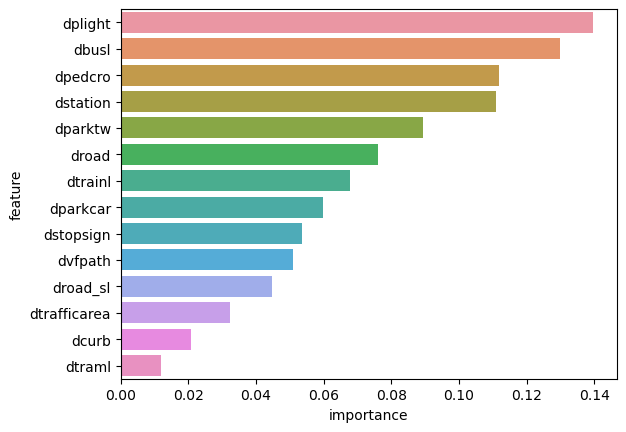

In [172]:
feature_name = list(x.columns.values.tolist())
importances = rf1.feature_importances_
df_rf1 = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rf1.sort_values(by = ['importances'], ascending = False, inplace = True)
sn.barplot(x = df_rf1['importances'], y = df_rf1['features'])
plt.xlabel('importance')
plt.ylabel('feature')

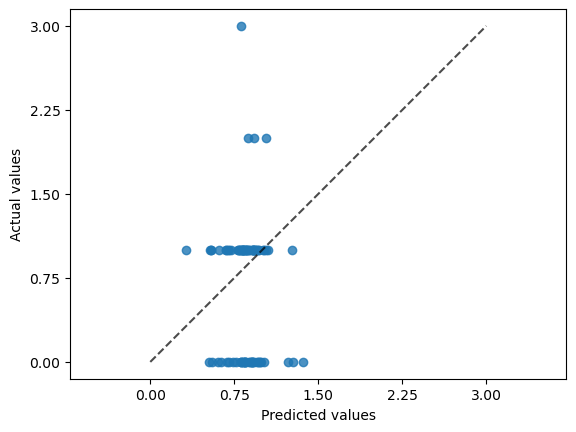

In [173]:
display = PredictionErrorDisplay.from_predictions(y_true=y_test1, 
                                                  y_pred=y_pred_rf1, 
                                                  kind  = 'actual_vs_predicted')
plt.show()

In [174]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y2, test_size = 0.25, random_state = 2)
rf2 = RandomForestRegressor(max_depth = 5, n_estimators = 10, random_state = 2)
rf2.fit(X_train2, y_train2)
y_pred_rf2 = rf2.predict(X_test2)

In [175]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test2, y_pred_rf2))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test2, y_pred_rf2))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test2, y_pred_rf2, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test2, y_pred_rf2))
print('Explained Variance Score:', metrics.explained_variance_score(y_test2, y_pred_rf2))
print('Max Error:', metrics.max_error(y_test2, y_pred_rf2))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test2, y_pred_rf2))
print('Median Absolute Error:', metrics.median_absolute_error(y_test2, y_pred_rf2))
print('R^2:', metrics.r2_score(y_test2, y_pred_rf2))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test2, y_pred_rf2))
# print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(y_test2, y_pred_rf2))

Mean Absolute Error (MAE): 0.23986856211893437
Mean Squared Error (MSE): 0.1200198118166083
Root Mean Squared Error (RMSE): 0.34643875622771814
Mean Absolute Percentage Error (MAPE): 596622470243121.2
Explained Variance Score: -0.0915707668244532
Max Error: 0.9129358609857292
Mean Squared Log Error: 0.0615248125627162
Median Absolute Error: 0.11209652884576933
R^2: -0.0973239937518473
Mean Poisson Deviance: 0.5612056483588573


Text(0, 0.5, 'feature')

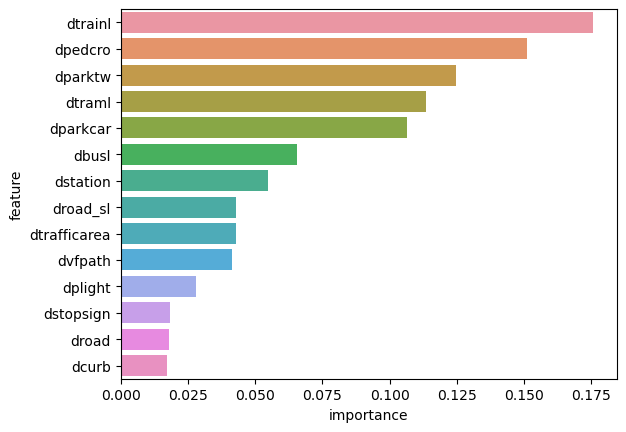

In [176]:
feature_name = list(x.columns.values.tolist())
importances = rf2.feature_importances_
df_rf2 = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rf2.sort_values(by = ['importances'], ascending = False, inplace = True)
sn.barplot(x = df_rf2['importances'], y = df_rf2['features'])
plt.xlabel('importance')
plt.ylabel('feature')

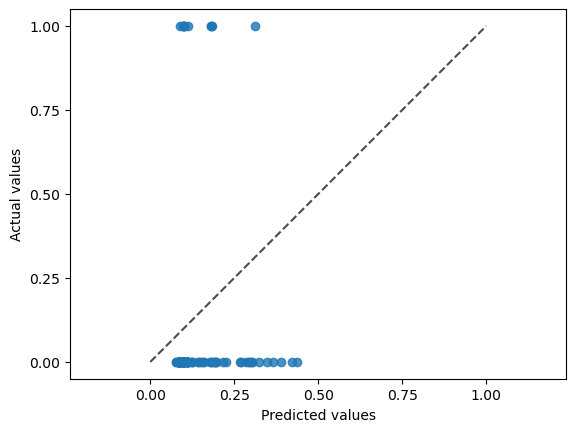

In [177]:
display = PredictionErrorDisplay.from_predictions(y_true=y_test2, 
                                                  y_pred=y_pred_rf2, 
                                                  kind  = 'actual_vs_predicted')
plt.show()

In [178]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(x, y3, test_size = 0.25, random_state = 3)
rf3 = RandomForestRegressor(max_depth = 5, n_estimators = 30, random_state = 3)
rf3.fit(X_train3, y_train3)
y_pred_rf3 = rf3.predict(X_test3)

In [179]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test3, y_pred_rf3))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test3, y_pred_rf3))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test3, y_pred_rf3, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test3, y_pred_rf3))
print('Explained Variance Score:', metrics.explained_variance_score(y_test3, y_pred_rf3))
print('Max Error:', metrics.max_error(y_test3, y_pred_rf3))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test3, y_pred_rf3))
print('Median Absolute Error:', metrics.median_absolute_error(y_test3, y_pred_rf3))
print('R^2:', metrics.r2_score(y_test3, y_pred_rf3))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test3, y_pred_rf3))
# print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(y_test3, y_pred_rf3))

Mean Absolute Error (MAE): 1173.2059277824662
Mean Squared Error (MSE): 3482059.4983939496
Root Mean Squared Error (RMSE): 1866.0277324825454
Mean Absolute Percentage Error (MAPE): 2.2734087839018555e+18
Explained Variance Score: -1.0841757542834798
Max Error: 11137.633723318362
Mean Squared Log Error: 25.447664216202373
Median Absolute Error: 729.4225412994651
R^2: -1.1894165101928817
Mean Poisson Deviance: 2127.6541562166713


Text(0, 0.5, 'feature')

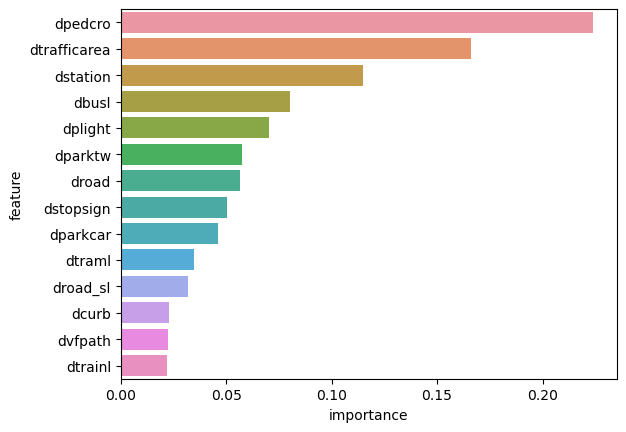

In [180]:
feature_name = list(x.columns.values.tolist())
importances = rf3.feature_importances_
df_rf3 = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rf3.sort_values(by = ['importances'], ascending = False, inplace = True)
sn.barplot(x = df_rf3['importances'], y = df_rf3['features'])
plt.xlabel('importance')
plt.ylabel('feature')

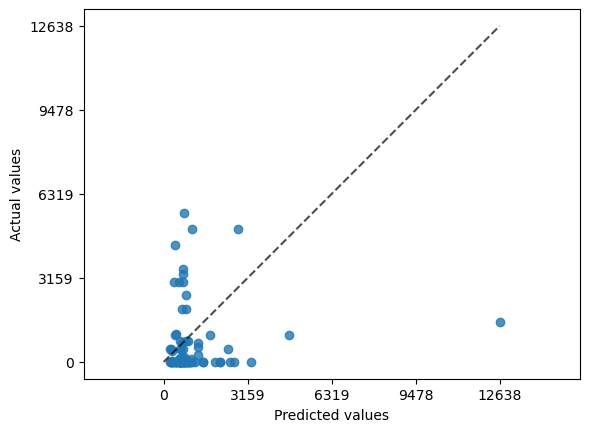

In [181]:
display = PredictionErrorDisplay.from_predictions(y_true=y_test3, 
                                                  y_pred=y_pred_rf3, 
                                                  kind  = 'actual_vs_predicted')
plt.show()

Mean Absolute Error (MAE): 0.2991996629469846
Mean Squared Error (MSE): 0.16451164966901455
Root Mean Squared Error (RMSE): 0.4056003570868923
Mean Absolute Percentage Error (MAPE): 642492153118030.0
Explained Variance Score: -0.00991047269529255
Max Error: 0.9461120359931382
Mean Squared Log Error: 0.08127949442543386
Median Absolute Error: 0.17409686502256672
R^2: -0.011093821457816455
Mean Poisson Deviance: 0.6660430153805647


Text(0, 0.5, 'feature')

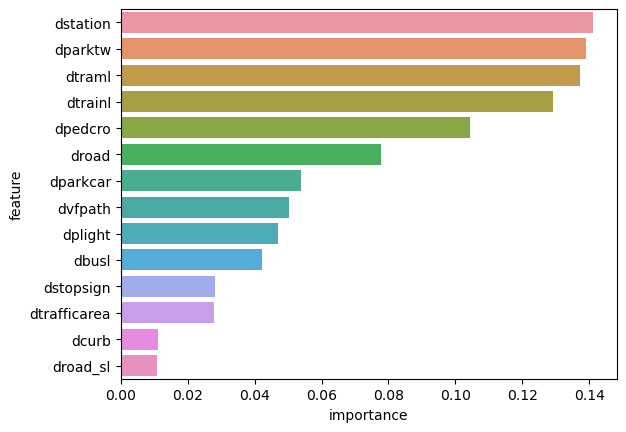

In [204]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(x, y4, test_size = 0.25, random_state = 4)
rf4 = RandomForestRegressor(max_depth = 5, n_estimators = 10, random_state = 4)
rf4.fit(X_train4, y_train4)
y_pred_rf4 = rf4.predict(X_test4)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test4, y_pred_rf4))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test4, y_pred_rf4))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test4, y_pred_rf4, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test4, y_pred_rf4))
print('Explained Variance Score:', metrics.explained_variance_score(y_test4, y_pred_rf4))
print('Max Error:', metrics.max_error(y_test4, y_pred_rf4))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test4, y_pred_rf4))
print('Median Absolute Error:', metrics.median_absolute_error(y_test4, y_pred_rf4))
print('R^2:', metrics.r2_score(y_test4, y_pred_rf4))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test4, y_pred_rf4))
# print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(y_test4, y_pred_rf4))
feature_name = list(x.columns.values.tolist())
importances = rf4.feature_importances_
df_rf4 = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rf4.sort_values(by = ['importances'], ascending = False, inplace = True)
sn.barplot(x = df_rf4['importances'], y = df_rf4['features'])
plt.xlabel('importance')
plt.ylabel('feature')

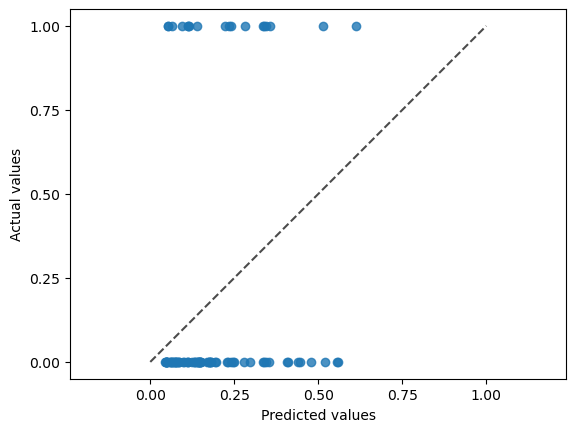

In [205]:
display = PredictionErrorDisplay.from_predictions(y_true=y_test4, 
                                                  y_pred=y_pred_rf4, 
                                                  kind  = 'actual_vs_predicted')
plt.show()

Train data accuracy: 0.9694656488549618
Test data accuracy: 0.7727272727272727


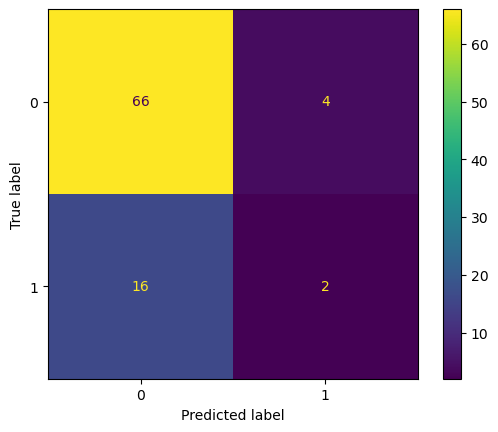

In [269]:
# Classifier
rfc4 = RandomForestClassifier(n_estimators = 5, random_state = 8)
rfc4.fit(X_train4, y_train4)
y_pred_rfc4 = rfc4.predict(X_test4)
print("Train data accuracy:",accuracy_score(y_true = y_train4, y_pred = rfc4.predict(X_train4)))
print("Test data accuracy:",accuracy_score(y_true = y_test4, y_pred = y_pred_rfc4))
confusion_matrix_rfc4 = metrics.confusion_matrix(y_test4, y_pred_rfc4)
# print(confusion_matrix_rfc4)
cm_display_rfc4 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rfc4)
cm_display_rfc4.plot()

In [270]:
acc_rfc4 = metrics.accuracy_score(y_test4, y_pred_rfc4)
print('accuracy', acc_rfc4)
pre_rfc4 = metrics.precision_score(y_test4, y_pred_rfc4, average = None)
print('precision', pre_rfc4)
senrec_rfc4 = metrics.recall_score(y_test4, y_pred_rfc4, average = None)
print('sensitivity recall', senrec_rfc4)
f1_rfc4 = metrics.f1_score(y_test4, y_pred_rfc4, average = None)
print('f1 score', f1_rfc4)

accuracy 0.7727272727272727
precision [0.80487805 0.33333333]
sensitivity recall [0.94285714 0.11111111]
f1 score [0.86842105 0.16666667]


Mean Absolute Error (MAE): 0.4028844656538222
Mean Squared Error (MSE): 0.23412495856241017
Root Mean Squared Error (RMSE): 0.4838646076769928
Mean Absolute Percentage Error (MAPE): 963358492685522.5
Explained Variance Score: -0.09790511437836424
Max Error: 0.9284381755089127
Mean Squared Log Error: 0.11331348438565633
Median Absolute Error: 0.3255342884840803
R^2: -0.10082797760006335
Mean Poisson Deviance: 0.5595984903901476


Text(0, 0.5, 'feature')

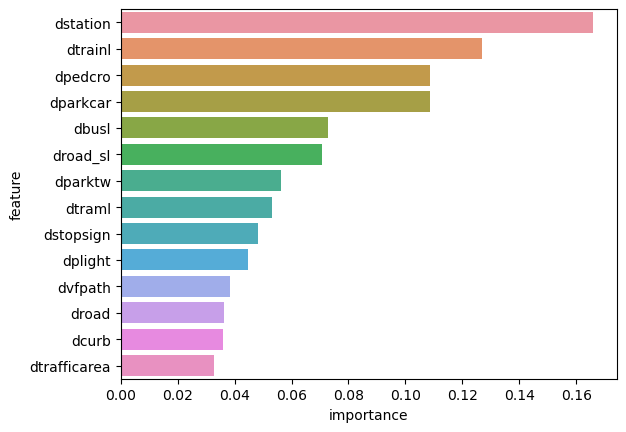

In [206]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(x, y5, test_size = 0.25, random_state = 5)
rf5 = RandomForestRegressor(max_depth = 5, n_estimators = 10, random_state = 5)
rf5.fit(X_train5, y_train5)
y_pred_rf5 = rf5.predict(X_test5)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test5, y_pred_rf5))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test5, y_pred_rf5))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test5, y_pred_rf5, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test5, y_pred_rf5))
print('Explained Variance Score:', metrics.explained_variance_score(y_test5, y_pred_rf5))
print('Max Error:', metrics.max_error(y_test5, y_pred_rf5))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test5, y_pred_rf5))
print('Median Absolute Error:', metrics.median_absolute_error(y_test5, y_pred_rf5))
print('R^2:', metrics.r2_score(y_test5, y_pred_rf5))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test5, y_pred_rf5))
# print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(y_test5, y_pred_rf5))
feature_name = list(x.columns.values.tolist())
importances = rf5.feature_importances_
df_rf5 = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rf5.sort_values(by = ['importances'], ascending = False, inplace = True)
sn.barplot(x = df_rf5['importances'], y = df_rf5['features'])
plt.xlabel('importance')
plt.ylabel('feature')

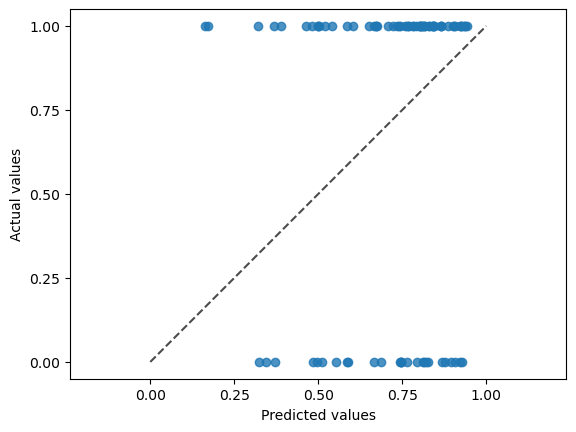

In [207]:
display = PredictionErrorDisplay.from_predictions(y_true=y_test5, 
                                                  y_pred=y_pred_rf5, 
                                                  kind  = 'actual_vs_predicted')
plt.show()

Train data accuracy: 0.9656488549618321
Test data accuracy: 0.6477272727272727


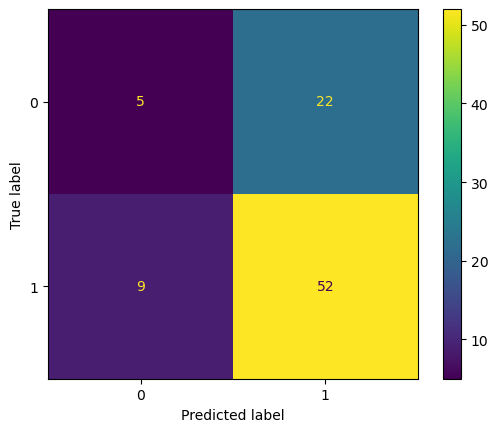

In [271]:
# Classifier
rfc5 = RandomForestClassifier(n_estimators = 5, random_state = 8)
rfc5.fit(X_train5, y_train5)
y_pred_rfc5 = rfc5.predict(X_test5)
print("Train data accuracy:",accuracy_score(y_true = y_train5, y_pred = rfc5.predict(X_train5)))
print("Test data accuracy:",accuracy_score(y_true = y_test5, y_pred = y_pred_rfc5))
confusion_matrix_rfc5 = metrics.confusion_matrix(y_test5, y_pred_rfc5)
# print(confusion_matrix_rfc5)
cm_display_rfc5 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rfc5)
cm_display_rfc5.plot()

In [272]:
acc_rfc5 = metrics.accuracy_score(y_test5, y_pred_rfc5)
print('accuracy', acc_rfc5)
pre_rfc5 = metrics.precision_score(y_test5, y_pred_rfc5, average = None)
print('precision', pre_rfc5)
senrec_rfc5 = metrics.recall_score(y_test5, y_pred_rfc5, average = None)
print('sensitivity recall', senrec_rfc5)
f1_rfc5 = metrics.f1_score(y_test5, y_pred_rfc5, average = None)
print('f1 score', f1_rfc5)

accuracy 0.6477272727272727
precision [0.35714286 0.7027027 ]
sensitivity recall [0.18518519 0.85245902]
f1 score [0.24390244 0.77037037]


Mean Absolute Error (MAE): 0.4533522368899451
Mean Squared Error (MSE): 0.24405587080244004
Root Mean Squared Error (RMSE): 0.4940201117388239
Mean Absolute Percentage Error (MAPE): 949807374526121.5
Explained Variance Score: 0.027256441521553043
Max Error: 0.8471376811594202
Mean Squared Log Error: 0.11695940389132115
Median Absolute Error: 0.44197751834699045
R^2: 0.023272008530183186
Mean Poisson Deviance: 0.6724710144900959


Text(0, 0.5, 'feature')

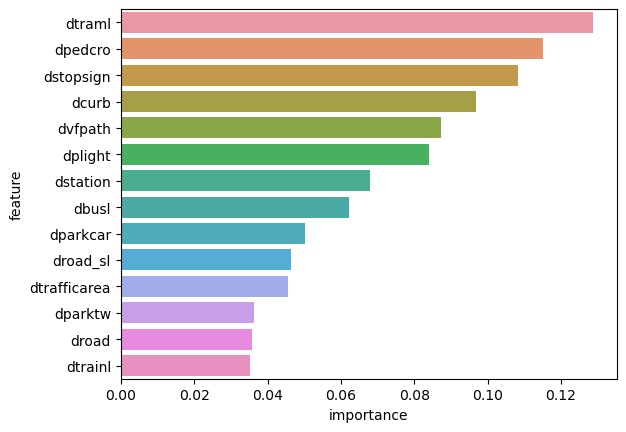

In [208]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(x, y6, test_size = 0.25, random_state = 6)
rf6 = RandomForestRegressor(max_depth = 5, n_estimators = 10, random_state = 6)
rf6.fit(X_train6, y_train6)
y_pred_rf6 = rf6.predict(X_test6)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test6, y_pred_rf6))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test6, y_pred_rf6))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test6, y_pred_rf6, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test6, y_pred_rf6))
print('Explained Variance Score:', metrics.explained_variance_score(y_test6, y_pred_rf6))
print('Max Error:', metrics.max_error(y_test6, y_pred_rf6))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test6, y_pred_rf6))
print('Median Absolute Error:', metrics.median_absolute_error(y_test6, y_pred_rf6))
print('R^2:', metrics.r2_score(y_test6, y_pred_rf6))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test6, y_pred_rf6))
# print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(y_test6, y_pred_rf6))
feature_name = list(x.columns.values.tolist())
importances = rf6.feature_importances_
df_rf6 = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rf6.sort_values(by = ['importances'], ascending = False, inplace = True)
sn.barplot(x = df_rf6['importances'], y = df_rf6['features'])
plt.xlabel('importance')
plt.ylabel('feature')

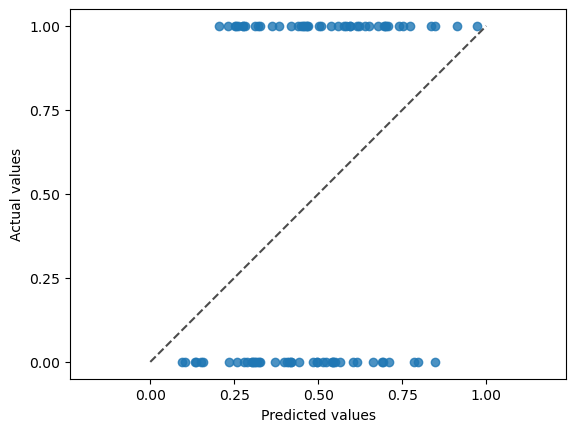

In [209]:
display = PredictionErrorDisplay.from_predictions(y_true=y_test6, 
                                                  y_pred=y_pred_rf6, 
                                                  kind  = 'actual_vs_predicted')
plt.show()

Train data accuracy: 0.9656488549618321
Test data accuracy: 0.5227272727272727


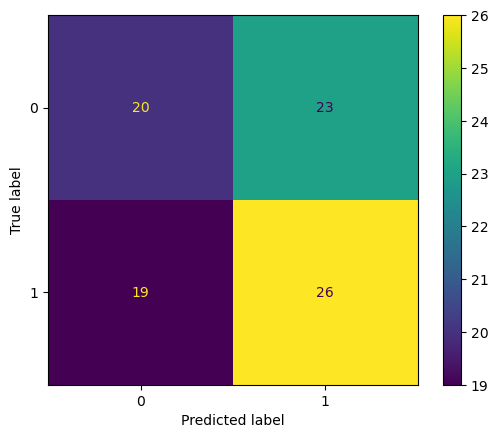

In [273]:
# Classifier
rfc6 = RandomForestClassifier(n_estimators = 5, random_state = 8)
rfc6.fit(X_train6, y_train6)
y_pred_rfc6 = rfc6.predict(X_test6)
print("Train data accuracy:",accuracy_score(y_true = y_train6, y_pred = rfc6.predict(X_train6)))
print("Test data accuracy:",accuracy_score(y_true = y_test6, y_pred = y_pred_rfc6))
confusion_matrix_rfc6 = metrics.confusion_matrix(y_test6, y_pred_rfc6)
# print(confusion_matrix_rfc6)
cm_display_rfc6 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rfc6)
cm_display_rfc6.plot()

In [274]:
acc_rfc6 = metrics.accuracy_score(y_test6, y_pred_rfc6)
print('accuracy', acc_rfc6)
pre_rfc6 = metrics.precision_score(y_test6, y_pred_rfc6, average = None)
print('precision', pre_rfc6)
senrec_rfc6 = metrics.recall_score(y_test6, y_pred_rfc6, average = None)
print('sensitivity recall', senrec_rfc6)
f1_rfc6 = metrics.f1_score(y_test6, y_pred_rfc6, average = None)
print('f1 score', f1_rfc6)

accuracy 0.5227272727272727
precision [0.51282051 0.53061224]
sensitivity recall [0.46511628 0.57777778]
f1 score [0.48780488 0.55319149]


In [182]:
# Value & categories
tt_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Nr            350 non-null    int64  
 1   gvm_dwv       350 non-null    int64  
 2   gvm_msp       350 non-null    int64  
 3   gvm_asp       350 non-null    int64  
 4   curbtype      350 non-null    int64  
 5   z_stznr       350 non-null    int64  
 6   z_qnr         350 non-null    int64  
 7   z_knr         350 non-null    int64  
 8   trafficarea   350 non-null    object 
 9   r_width       350 non-null    int64  
 10  r_surface     350 non-null    object 
 11  speedlimit    350 non-null    float64
 12  bicyclecount  146 non-null    float64
 13  carcount      188 non-null    float64
dtypes: float64(3), int64(9), object(2)
memory usage: 38.4+ KB


In [190]:
# Values 
print(len(tt_attr['gvm_dwv'].unique()), len(tt_attr['gvm_msp'].unique()), len(tt_attr['gvm_dwv'].unique()),
      len(tt_attr['bicyclecount'].unique()), len(tt_attr['carcount'].unique()))

149 130 149 89 184


In [224]:
tt_attrv = tt_attr.copy(deep = True)

In [225]:
tt_attrv = tt_attrv[['Nr', 'gvm_dwv', 'gvm_msp', 'gvm_asp', 
                     'bicyclecount', 'carcount', 'r_width', 'speedlimit']]

In [230]:
tt_attrv.columns

Index(['Nr', 'gvm_dwv', 'gvm_msp', 'gvm_asp', 'bicyclecount', 'carcount',
       'r_width', 'speedlimit'],
      dtype='object')

In [228]:
tt_attrv1 = tt_attrv[~tt_attrv.isnull().any(axis = 1)]

In [229]:
tt_attrv1

,Nr,gvm_dwv,gvm_msp,gvm_asp,bicyclecount,carcount,r_width,speedlimit
7,99900046662300,300,20,20,0.00841,2644.0,10,30.0
10,99900049507279,13500,600,890,0.00841,88682.0,3,0.0
11,99900054759250,11100,790,830,2525.00841,32619.0,8,50.0
26,99900056946259,17200,1120,1150,5325.00841,32420.0,10,50.0
27,99900055906951,400,30,30,4689.00841,34825.0,8,30.0
...,...,...,...,...,...,...,...,...
336,99900051012410,2800,150,240,17518.00841,14947.0,4,30.0
341,99900054491542,700,30,60,5046.00841,25164.0,4,20.0
343,99900056387598,4200,340,400,12416.00841,77923.0,6,30.0
344,99900055999694,200,20,20,19020.00841,80919.0,3,30.0


In [232]:
c3 = ['gvm_dwv', 'gvm_msp', 'gvm_asp', 'bicyclecount', 
      'carcount', 'r_width', 'speedlimit']

Text(0.5, 1.0, 'speedlimit')

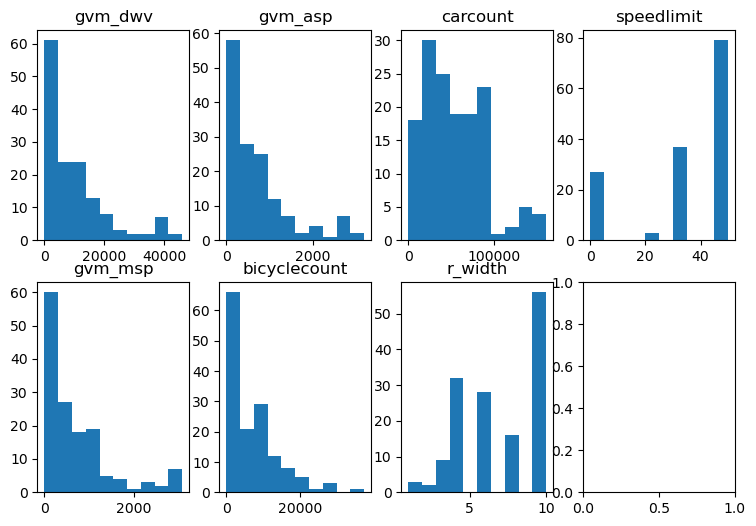

In [235]:
fig, axes = plt.subplots(ncols=4, nrows=2,
                         figsize=(3*3, 2*3))
axes[0,0].hist(tt_attrv1[c3[0]])
axes[0,0].set_title(c3[0])
axes[1,0].hist(tt_attrv1[c3[1]])
axes[1,0].set_title(c3[1])
axes[0,1].hist(tt_attrv1[c3[2]])
axes[0,1].set_title(c3[2])
axes[1,1].hist(tt_attrv1[c3[3]])
axes[1,1].set_title(c3[3])
axes[0,2].hist(tt_attrv1[c3[4]])
axes[0,2].set_title(c3[4])
axes[1,2].hist(tt_attrv1[c3[5]])
axes[1,2].set_title(c3[5])
axes[0,3].hist(tt_attrv1[c3[6]])
axes[0,3].set_title(c3[6])

Text(0.5, 1.0, 'speedlimit')

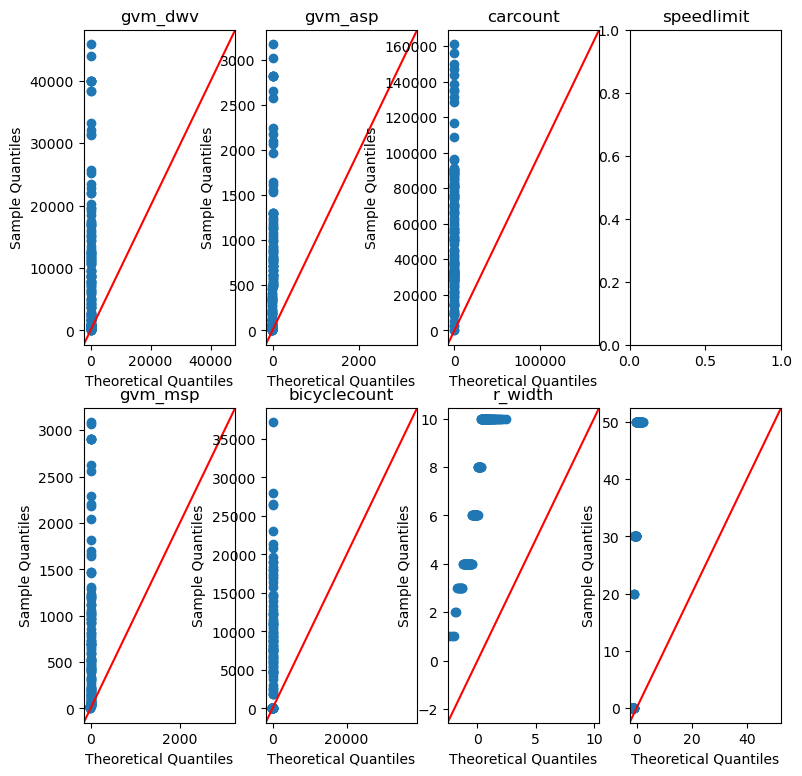

In [237]:
fig, axes = plt.subplots(ncols=4, nrows=2,
                         figsize=(3*3, 3*3))
sm.qqplot(tt_attrv1[c3[0]], line = '45', ax = axes[0,0])
axes[0,0].set_title(c3[0])
sm.qqplot(tt_attrv1[c3[1]], line = '45', ax = axes[1,0])
axes[1,0].set_title(c3[1])
sm.qqplot(tt_attrv1[c3[2]], line = '45', ax = axes[0,1])
axes[0,1].set_title(c3[2])
sm.qqplot(tt_attrv1[c3[3]], line = '45', ax = axes[1,1])
axes[1,1].set_title(c3[3])
sm.qqplot(tt_attrv1[c3[4]], line = '45', ax = axes[0,2])
axes[0,2].set_title(c3[4])
sm.qqplot(tt_attrv1[c3[5]], line = '45', ax = axes[1,2])
axes[1,2].set_title(c3[5])
sm.qqplot(tt_attrv1[c3[6]], line = '45', ax = axes[1,3])
axes[0,3].set_title(c3[6])

In [241]:
# Transformation
attrv1 = tt_attrv1.copy(deep = True)
attrv1[c3[0]], a1 = stats.yeojohnson(attrv1[c3[0]])
attrv1[c3[1]], a2 = stats.yeojohnson(attrv1[c3[1]])
attrv1[c3[2]], a3 = stats.yeojohnson(attrv1[c3[2]])
attrv1[c3[3]], a4 = stats.yeojohnson(attrv1[c3[3]])
attrv1[c3[4]], a5 = stats.yeojohnson(attrv1[c3[4]])
attrv1[c3[5]], a6 = stats.yeojohnson(attrv1[c3[5]])
attrv1[c3[6]], a7 = stats.yeojohnson(attrv1[c3[6]])

Text(0.5, 1.0, 'speedlimit')

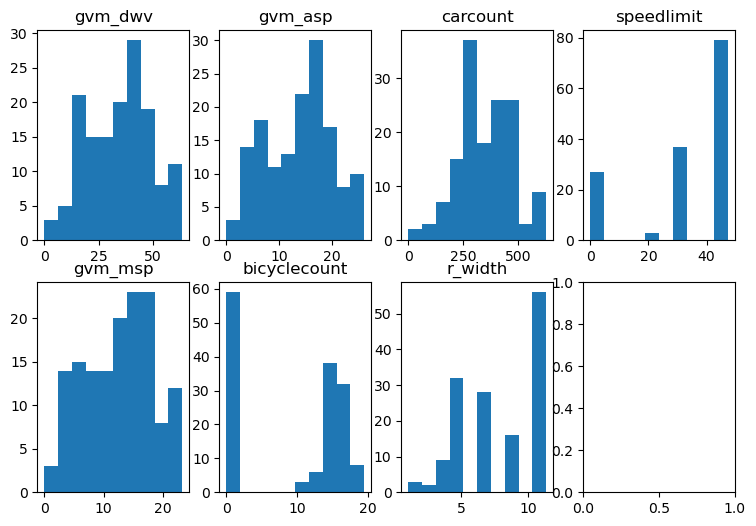

In [242]:
fig, axes = plt.subplots(ncols=4, nrows=2,
                         figsize=(3*3, 2*3))
axes[0,0].hist(attrv1[c3[0]])
axes[0,0].set_title(c3[0])
axes[1,0].hist(attrv1[c3[1]])
axes[1,0].set_title(c3[1])
axes[0,1].hist(attrv1[c3[2]])
axes[0,1].set_title(c3[2])
axes[1,1].hist(attrv1[c3[3]])
axes[1,1].set_title(c3[3])
axes[0,2].hist(attrv1[c3[4]])
axes[0,2].set_title(c3[4])
axes[1,2].hist(attrv1[c3[5]])
axes[1,2].set_title(c3[5])
axes[0,3].hist(attrv1[c3[6]])
axes[0,3].set_title(c3[6])

In [243]:
# Standardization
attrv1[c3[0]] = stats.zscore(attrv1[c3[0]])
attrv1[c3[1]] = stats.zscore(attrv1[c3[1]])
attrv1[c3[2]] = stats.zscore(attrv1[c3[2]])
attrv1[c3[3]] = stats.zscore(attrv1[c3[3]])
attrv1[c3[4]] = stats.zscore(attrv1[c3[4]])
attrv1[c3[5]] = stats.zscore(attrv1[c3[5]])
attrv1[c3[6]] = stats.zscore(attrv1[c3[6]])

Text(0.5, 1.0, 'speedlimit')

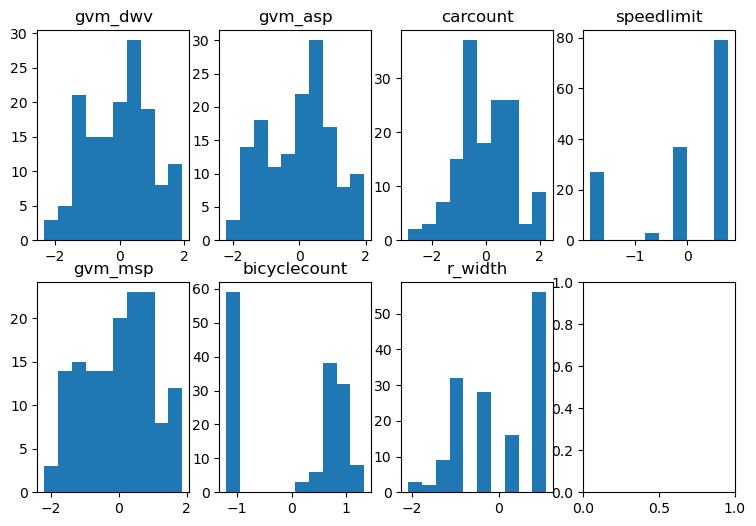

In [244]:
fig, axes = plt.subplots(ncols=4, nrows=2,
                         figsize=(3*3, 2*3))
axes[0,0].hist(attrv1[c3[0]])
axes[0,0].set_title(c3[0])
axes[1,0].hist(attrv1[c3[1]])
axes[1,0].set_title(c3[1])
axes[0,1].hist(attrv1[c3[2]])
axes[0,1].set_title(c3[2])
axes[1,1].hist(attrv1[c3[3]])
axes[1,1].set_title(c3[3])
axes[0,2].hist(attrv1[c3[4]])
axes[0,2].set_title(c3[4])
axes[1,2].hist(attrv1[c3[5]])
axes[1,2].set_title(c3[5])
axes[0,3].hist(attrv1[c3[6]])
axes[0,3].set_title(c3[6])

Text(0.5, 1.0, 'speedlimit')

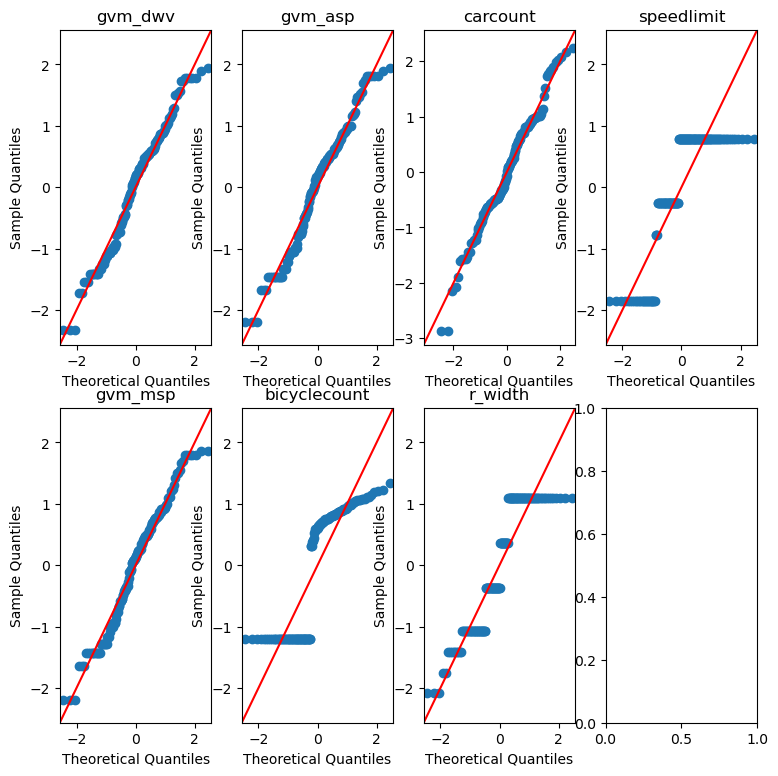

In [247]:
fig, axes = plt.subplots(ncols=4, nrows=2,
                         figsize=(3*3, 3*3))
sm.qqplot(attrv1[c3[0]], line = '45', ax = axes[0,0])
axes[0,0].set_title(c3[0])
sm.qqplot(attrv1[c3[1]], line = '45', ax = axes[1,0])
axes[1,0].set_title(c3[1])
sm.qqplot(attrv1[c3[2]], line = '45', ax = axes[0,1])
axes[0,1].set_title(c3[2])
sm.qqplot(attrv1[c3[3]], line = '45', ax = axes[1,1])
axes[1,1].set_title(c3[3])
sm.qqplot(attrv1[c3[4]], line = '45', ax = axes[0,2])
axes[0,2].set_title(c3[4])
sm.qqplot(attrv1[c3[5]], line = '45', ax = axes[1,2])
axes[1,2].set_title(c3[5])
sm.qqplot(attrv1[c3[6]], line = '45', ax = axes[0,3])
axes[0,3].set_title(c3[6])

In [248]:
# 0 1 for severity
ap = accident.copy(deep = True)
ap = ap.assign(svp = 1)
ap = ap.assign(lvp = 1)
ap = ap.assign(pdp = 1)
ap.loc[ap['SV'] == 0, 'svp'] = 0
ap.loc[ap['LV'] == 0, 'lvp'] = 0
ap.loc[ap['pd'] == 0, 'pdp'] = 0

In [249]:
acc_attrv1 = attrv1.merge(ap, on = ['Nr'])

In [250]:
acc_attrv1

,Nr,gvm_dwv,gvm_msp,gvm_asp,bicyclecount,carcount,r_width,speedlimit,SV,LV,pd,svp,lvp,pdp
0,99900046662300,-1.418370,-1.431036,-1.466048,-1.197593,-2.152750,1.091000,-0.258284,0,1,2300,0,1,1
1,99900049507279,0.667994,0.351048,0.645968,-1.197593,0.977990,-1.413005,-1.855915,0,1,0,0,1,0
2,99900054759250,0.500663,0.567305,0.585885,0.397899,-0.481618,0.357552,0.785047,0,0,3000,0,0,1
3,99900056946259,0.887685,0.862250,0.875878,0.631326,-0.488582,1.091000,0.785047,0,1,4100,0,1,1
4,99900055906951,-1.324654,-1.287480,-1.327146,0.590208,-0.405859,0.357552,-0.258284,0,0,300,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,99900051012410,-0.456712,-0.551282,-0.323174,1.044614,-1.224681,-1.068229,-0.258284,0,1,0,0,1,0
142,99900054491542,-1.119962,-1.287480,-1.050961,0.613860,-0.759842,-1.068229,-0.784157,0,1,0,0,1,0
143,99900056387598,-0.210854,-0.054125,0.016953,0.919696,0.747960,-0.363312,-0.258284,0,1,500,0,1,1
144,99900055999694,-1.538577,-1.431036,-1.466048,1.075151,0.813605,-1.413005,-0.258284,0,2,800,0,1,1


In [251]:
c3

['gvm_dwv',
 'gvm_msp',
 'gvm_asp',
 'bicyclecount',
 'carcount',
 'r_width',
 'speedlimit']

In [254]:
Y = acc_attrv1['SV']
X = acc_attrv1[c3]
X = sm.add_constant(X)
model = sm.OLS(Y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     SV   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.8754
Date:                Mon, 25 Mar 2024   Prob (F-statistic):              0.528
Time:                        16:57:21   Log-Likelihood:                -53.914
No. Observations:                 146   AIC:                             123.8
Df Residuals:                     138   BIC:                             147.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1507      0.030      5.057      0.000       0.092       0.210
gvm_dwv         -0.0494      0.264     -0.188      0.852      -0.571       0.472
gvm_msp          0.0272      0.216      0.126      0.900      -0.400       0.454
gvm_asp          0.0861      0.248      0.348      0.729      -0.404       0.576
bicyclecount    -0.0444      0.032     -1.401      0.163      -0.107       0.018
carcount        -0.0211      0.032     -0.656      0.513      -0.085       0.043
r_width         -0.0040      0.033     -0.120      0.905      -0.069       0.061
speedlimit       0.0157      0.032      0.483      0.630      -0.048       0.080
==============================================================================
Omnibus:                       53.962   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.306
Skew:                           1.841   Prob(JB):                     1.65e-22
Kurtosis:                       4.712   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [255]:
Y = acc_attrv1['LV']
X = acc_attrv1[c3]
X = sm.add_constant(X)
model = sm.OLS(Y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     LV   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                    0.2503
Date:                Mon, 25 Mar 2024   Prob (F-statistic):              0.971
Time:                        16:57:21   Log-Likelihood:                -117.41
No. Observations:                 146   AIC:                             250.8
Df Residuals:                     138   BIC:                             274.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.8014      0.046     17.408      0.000       0.710       0.892
gvm_dwv         -0.0180      0.407     -0.044      0.965      -0.823       0.788
gvm_msp          0.1251      0.334      0.375      0.708      -0.535       0.785
gvm_asp         -0.1380      0.383     -0.361      0.719      -0.895       0.619
bicyclecount    -0.0273      0.049     -0.557      0.578      -0.124       0.070
carcount         0.0528      0.050      1.062      0.290      -0.046       0.151
r_width          0.0274      0.051      0.537      0.592      -0.074       0.129
speedlimit       0.0084      0.050      0.168      0.867      -0.091       0.107
==============================================================================
Omnibus:                        1.338   Durbin-Watson:                   2.284
Prob(Omnibus):                  0.512   Jarque-Bera (JB):                1.429
Skew:                          -0.199   Prob(JB):                        0.489
Kurtosis:                       2.723   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [256]:
Y = acc_attrv1['pd']
X = acc_attrv1[c3]
X = sm.add_constant(X)
model = sm.OLS(Y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pd   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.8196
Date:                Mon, 25 Mar 2024   Prob (F-statistic):              0.573
Time:                        16:57:21   Log-Likelihood:                -1269.2
No. Observations:                 146   AIC:                             2554.
Df Residuals:                     138   BIC:                             2578.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          652.6096    122.786      5.315      0.000     409.825     895.394
gvm_dwv       -870.1817   1086.560     -0.801      0.425   -3018.641    1278.277
gvm_msp        525.4547    889.944      0.590      0.556   -1234.235    2285.144
gvm_asp        488.4702   1020.493      0.479      0.633   -1529.354    2506.294
bicyclecount  -140.2002    130.626     -1.073      0.285    -398.488     118.088
carcount       178.3300    132.760      1.343      0.181     -84.177     440.837
r_width         -4.1010    136.376     -0.030      0.976    -273.758     265.556
speedlimit      21.0071    133.602      0.157      0.875    -243.165     285.179
==============================================================================
Omnibus:                      114.113   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              861.147
Skew:                           2.914   Prob(JB):                    1.01e-187
Kurtosis:                      13.373   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [257]:
Y = acc_attrv1['svp']
X = acc_attrv1[c3]
X = sm.add_constant(X)
model = sm.OLS(Y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    svp   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.8754
Date:                Mon, 25 Mar 2024   Prob (F-statistic):              0.528
Time:                        16:57:21   Log-Likelihood:                -53.914
No. Observations:                 146   AIC:                             123.8
Df Residuals:                     138   BIC:                             147.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1507      0.030      5.057      0.000       0.092       0.210
gvm_dwv         -0.0494      0.264     -0.188      0.852      -0.571       0.472
gvm_msp          0.0272      0.216      0.126      0.900      -0.400       0.454
gvm_asp          0.0861      0.248      0.348      0.729      -0.404       0.576
bicyclecount    -0.0444      0.032     -1.401      0.163      -0.107       0.018
carcount        -0.0211      0.032     -0.656      0.513      -0.085       0.043
r_width         -0.0040      0.033     -0.120      0.905      -0.069       0.061
speedlimit       0.0157      0.032      0.483      0.630      -0.048       0.080
==============================================================================
Omnibus:                       53.962   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.306
Skew:                           1.841   Prob(JB):                     1.65e-22
Kurtosis:                       4.712   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [258]:
Y = acc_attrv1['lvp']
X = acc_attrv1[c3]
X = sm.add_constant(X)
model = sm.OLS(Y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lvp   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.041
Method:                 Least Squares   F-statistic:                    0.1853
Date:                Mon, 25 Mar 2024   Prob (F-statistic):              0.988
Time:                        16:57:22   Log-Likelihood:                -87.432
No. Observations:                 146   AIC:                             190.9
Df Residuals:                     138   BIC:                             214.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7329      0.037     19.549      0.000       0.659       0.807
gvm_dwv          0.1581      0.332      0.477      0.634      -0.498       0.814
gvm_msp         -0.1039      0.272     -0.383      0.703      -0.641       0.433
gvm_asp         -0.0541      0.312     -0.174      0.862      -0.670       0.562
bicyclecount     0.0122      0.040      0.307      0.759      -0.067       0.091
carcount         0.0054      0.041      0.133      0.894      -0.075       0.086
r_width         -0.0054      0.042     -0.130      0.896      -0.088       0.077
speedlimit      -0.0365      0.041     -0.894      0.373      -0.117       0.044
==============================================================================
Omnibus:                       34.270   Durbin-Watson:                   2.201
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.819
Skew:                          -1.035   Prob(JB):                     2.03e-07
Kurtosis:                       2.117   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [259]:
Y = acc_attrv1['pdp']
X = acc_attrv1[c3]
X = sm.add_constant(X)
model = sm.OLS(Y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pdp   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.5387
Date:                Mon, 25 Mar 2024   Prob (F-statistic):              0.804
Time:                        16:57:22   Log-Likelihood:                -103.12
No. Observations:                 146   AIC:                             222.2
Df Residuals:                     138   BIC:                             246.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4452      0.042     10.666      0.000       0.363       0.528
gvm_dwv         -0.2954      0.369     -0.800      0.425      -1.026       0.435
gvm_msp          0.1955      0.303      0.646      0.519      -0.403       0.794
gvm_asp          0.1432      0.347      0.413      0.680      -0.543       0.829
bicyclecount    -0.0102      0.044     -0.229      0.819      -0.098       0.078
carcount        -0.0184      0.045     -0.407      0.685      -0.108       0.071
r_width         -0.0659      0.046     -1.421      0.157      -0.158       0.026
speedlimit       0.0398      0.045      0.877      0.382      -0.050       0.130
==============================================================================
Omnibus:                     1066.479   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.956
Skew:                           0.204   Prob(JB):                     1.71e-05
Kurtosis:                       1.145   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y1 = acc_attrv1['LV']
y2 = acc_attrv1['SV']
y3 = acc_attrv1['pd']
y4 = acc_attrv1['svp']
y5 = acc_attrv1['lvp']
y6 = acc_attrv1['pdp']
x = acc_attrv1[c1]

In [276]:
# 146 points with bicyclecount & carcount
# acc_attrv1.to_csv('/home/yelhe/data/Traffic_network_variables/ttvariables_value_partcount_norm_stand.csv', index = False)

In [277]:
# not considering partial count of bicycle / car
tt_attrv2 = tt_attrv.copy(deep = True)

In [280]:
tt_attrv2 = tt_attrv2.drop(['bicyclecount', 'carcount'], axis = 1)

In [281]:
tt_attrv2.columns

Index(['Nr', 'gvm_dwv', 'gvm_msp', 'gvm_asp', 'r_width', 'speedlimit'], dtype='object')

In [282]:
c4 = ['gvm_dwv', 'gvm_msp', 'gvm_asp', 'r_width', 'speedlimit']

In [283]:
# Transformation
attrv2 = tt_attrv2.copy(deep = True)
attrv2[c4[0]], a1 = stats.yeojohnson(attrv2[c4[0]])
attrv2[c4[1]], a2 = stats.yeojohnson(attrv2[c4[1]])
attrv2[c4[2]], a3 = stats.yeojohnson(attrv2[c4[2]])
attrv2[c4[3]], a4 = stats.yeojohnson(attrv2[c4[3]])
attrv2[c4[4]], a5 = stats.yeojohnson(attrv2[c4[4]])

In [284]:
# Standardization
attrv2[c4[0]] = stats.zscore(attrv2[c4[0]])
attrv2[c4[1]] = stats.zscore(attrv2[c4[1]])
attrv2[c4[2]] = stats.zscore(attrv2[c4[2]])
attrv2[c4[3]] = stats.zscore(attrv2[c4[3]])
attrv2[c4[4]] = stats.zscore(attrv2[c4[4]])

Text(0.5, 1.0, 'speedlimit')

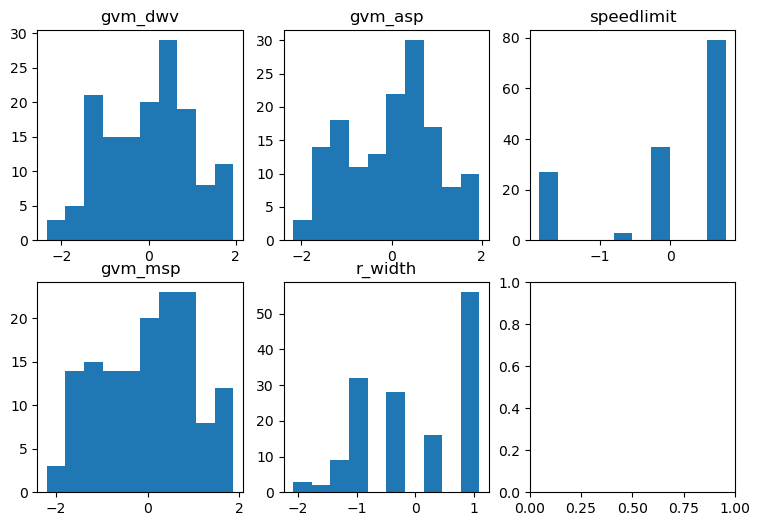

In [285]:
fig, axes = plt.subplots(ncols=3, nrows=2,
                         figsize=(3*3, 2*3))
axes[0,0].hist(attrv1[c4[0]])
axes[0,0].set_title(c4[0])
axes[1,0].hist(attrv1[c4[1]])
axes[1,0].set_title(c4[1])
axes[0,1].hist(attrv1[c4[2]])
axes[0,1].set_title(c4[2])
axes[1,1].hist(attrv1[c4[3]])
axes[1,1].set_title(c4[3])
axes[0,2].hist(attrv1[c4[4]])
axes[0,2].set_title(c4[4])

Text(0.5, 1.0, 'speedlimit')

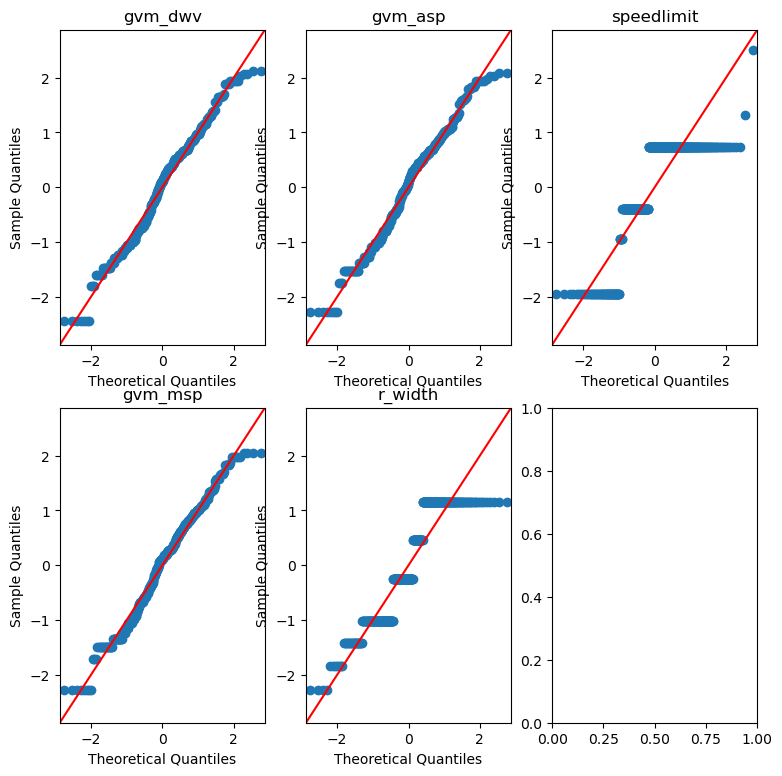

In [286]:
fig, axes = plt.subplots(ncols=3, nrows=2,
                         figsize=(3*3, 3*3))
sm.qqplot(attrv2[c4[0]], line = '45', ax = axes[0,0])
axes[0,0].set_title(c4[0])
sm.qqplot(attrv2[c4[1]], line = '45', ax = axes[1,0])
axes[1,0].set_title(c4[1])
sm.qqplot(attrv2[c4[2]], line = '45', ax = axes[0,1])
axes[0,1].set_title(c4[2])
sm.qqplot(attrv2[c4[3]], line = '45', ax = axes[1,1])
axes[1,1].set_title(c4[3])
sm.qqplot(attrv2[c4[4]], line = '45', ax = axes[0,2])
axes[0,2].set_title(c4[4])


In [288]:
# all points without complete bicyclecount & carcount
# attrv2.to_csv('/home/yelhe/data/Traffic_network_variables/ttvariables_value_norm_stand.csv', index = False)

#### Categorical variables

In [301]:
import category_encoders as ce

In [214]:
# Categorical
print(len(tt_attr['z_stznr'].unique()), len(tt_attr['z_qnr'].unique()), len(tt_attr['z_knr'].unique()),
      len(tt_attr['trafficarea'].unique()), len(tt_attr['r_width'].unique()), len(tt_attr['r_surface'].unique()), 
      len(tt_attr['speedlimit'].unique()), len(tt_attr['curbtype'].unique()))

122 33 12 3 7 2 6 2


In [213]:
tt_attr['curbtype'].unique()

array([25, 15])

In [289]:
tt_attr.columns

Index(['Nr', 'gvm_dwv', 'gvm_msp', 'gvm_asp', 'curbtype', 'z_stznr', 'z_qnr',
       'z_knr', 'trafficarea', 'r_width', 'r_surface', 'speedlimit',
       'bicyclecount', 'carcount'],
      dtype='object')

In [290]:
tt_attrc = tt_attr.copy(deep = True)
tt_attrc = tt_attrc[['Nr','curbtype','z_stznr','z_qnr','z_knr','trafficarea',
                     'r_width','r_surface','speedlimit']]

In [291]:
tt_attrc.columns

Index(['Nr', 'curbtype', 'z_stznr', 'z_qnr', 'z_knr', 'trafficarea', 'r_width',
       'r_surface', 'speedlimit'],
      dtype='object')

In [297]:
tt_attrc['trafficarea'].unique()

array(['T30', 'T20', 'T0'], dtype=object)

In [299]:
tt_attrc = tt_attrc.drop(['z_stznr'], axis = 1)

In [302]:
oh = ce.OneHotEncoder(cols = ['curbtype','z_qnr','z_knr','trafficarea',
                                    'r_width','r_surface','speedlimit'])
attrc_oh = oh.fit_transform(tt_attrc)

In [303]:
attrc_oh.columns

Index(['Nr', 'curbtype_1', 'curbtype_2', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3',
       'z_qnr_4', 'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_9',
       'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_15',
       'z_qnr_16', 'z_qnr_17', 'z_qnr_18', 'z_qnr_19', 'z_qnr_20', 'z_qnr_21',
       'z_qnr_22', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27',
       'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_qnr_33',
       'z_knr_1', 'z_knr_2', 'z_knr_3', 'z_knr_4', 'z_knr_5', 'z_knr_6',
       'z_knr_7', 'z_knr_8', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'z_knr_12',
       'trafficarea_1', 'trafficarea_2', 'trafficarea_3', 'r_width_1',
       'r_width_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6',
       'r_width_7', 'r_surface_1', 'r_surface_2', 'speedlimit_1',
       'speedlimit_2', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5',
       'speedlimit_6'],
      dtype='object')

In [305]:
tt_attrc_oh = tt_attrc.merge(attrc_oh, on = ['Nr'])

In [310]:
# All points with categorical data
# tt_attrc_oh.to_csv('/home/yelhe/data/Traffic_network_variables/ttvariables_categorical.csv', index = False)

In [311]:
tt_attrc_oh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Nr             350 non-null    int64  
 1   curbtype       350 non-null    int64  
 2   z_qnr          350 non-null    int64  
 3   z_knr          350 non-null    int64  
 4   trafficarea    350 non-null    object 
 5   r_width        350 non-null    int64  
 6   r_surface      350 non-null    object 
 7   speedlimit     350 non-null    float64
 8   curbtype_1     350 non-null    int64  
 9   curbtype_2     350 non-null    int64  
 10  z_qnr_1        350 non-null    int64  
 11  z_qnr_2        350 non-null    int64  
 12  z_qnr_3        350 non-null    int64  
 13  z_qnr_4        350 non-null    int64  
 14  z_qnr_5        350 non-null    int64  
 15  z_qnr_6        350 non-null    int64  
 16  z_qnr_7        350 non-null    int64  
 17  z_qnr_8        350 non-null    int64  
 18  z_qnr_9   

In [316]:
tt_dist_st

,Nr,dbusl,dtraml,dtrainl,dplight,dstation,dparkcar,dparktw,dpedcro,dstopsign,dcurb,dtrafficarea,droad,droad_sl,dvfpath
0,99900060852597,0.396257,-0.119860,-0.760942,-0.995660,-1.408004,0.055068,1.600021,-0.987361,0.734418,-1.752466,-0.608660,-0.604692,-0.605390,-1.354771
1,99900063018611,-0.145889,1.382238,2.895791,-1.546878,-0.900337,1.119018,2.329570,0.922575,-1.919746,0.947033,1.112913,-1.343002,-1.346949,-1.385904
2,99900052723510,0.945795,0.724999,0.122800,0.411885,0.995345,-0.883092,0.484260,0.794847,0.638917,0.115940,-1.305449,0.263594,0.281910,0.589023
3,99900061514043,-1.042366,0.598061,0.614803,0.418928,0.351359,-1.739233,1.329958,1.178437,1.494014,-0.812266,1.183275,-0.699602,-0.701314,-0.544839
4,99900063037843,0.635555,0.771691,2.595377,0.994665,0.760592,-1.135387,1.086626,1.392251,-0.210295,0.242780,-1.305449,0.399712,0.422626,0.718931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,99900055905276,-0.144309,-1.155351,1.791947,-2.834315,0.019810,0.743195,2.500649,0.390256,1.093929,0.889006,-0.795319,1.115097,1.170118,1.376359
346,99900060670975,1.332145,0.844334,1.432348,-0.074568,0.928721,-1.000687,1.722981,-1.116375,0.620443,-0.193214,-1.305449,-0.063878,-0.054782,0.270681
347,99900047367168,1.548064,-0.779092,1.261430,0.061233,-1.308186,2.195033,1.318132,1.744954,-0.200431,0.644934,1.051605,0.837090,0.878001,0.598701
348,99900050714619,1.239789,0.737543,0.704704,-0.233468,0.596602,-1.377652,0.317766,1.521424,0.548412,-0.178218,-1.305449,-0.063049,-0.053930,0.270327


In [314]:
attrv2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Nr          350 non-null    int64  
 1   gvm_dwv     350 non-null    float64
 2   gvm_msp     350 non-null    float64
 3   gvm_asp     350 non-null    float64
 4   r_width     350 non-null    float64
 5   speedlimit  350 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 16.5 KB


In [315]:
attrv2 = attrv2.rename(columns = {'r_width': 'r_width_value',
                                  'speedlimit': 'speedlimit_value'})

In [317]:
ttall = tt_dist_st.merge(attrv2, on = ['Nr'])

In [318]:
ttall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nr                350 non-null    int64  
 1   dbusl             350 non-null    float64
 2   dtraml            350 non-null    float64
 3   dtrainl           350 non-null    float64
 4   dplight           350 non-null    float64
 5   dstation          350 non-null    float64
 6   dparkcar          350 non-null    float64
 7   dparktw           350 non-null    float64
 8   dpedcro           350 non-null    float64
 9   dstopsign         350 non-null    float64
 10  dcurb             350 non-null    float64
 11  dtrafficarea      350 non-null    float64
 12  droad             350 non-null    float64
 13  droad_sl          350 non-null    float64
 14  dvfpath           350 non-null    float64
 15  gvm_dwv           350 non-null    float64
 16  gvm_msp           350 non-null    float64
 1

In [319]:
ttall = ttall.merge(tt_attrc_oh, on = ['Nr'])

In [320]:
ttall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 92 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nr                350 non-null    int64  
 1   dbusl             350 non-null    float64
 2   dtraml            350 non-null    float64
 3   dtrainl           350 non-null    float64
 4   dplight           350 non-null    float64
 5   dstation          350 non-null    float64
 6   dparkcar          350 non-null    float64
 7   dparktw           350 non-null    float64
 8   dpedcro           350 non-null    float64
 9   dstopsign         350 non-null    float64
 10  dcurb             350 non-null    float64
 11  dtrafficarea      350 non-null    float64
 12  droad             350 non-null    float64
 13  droad_sl          350 non-null    float64
 14  dvfpath           350 non-null    float64
 15  gvm_dwv           350 non-null    float64
 16  gvm_msp           350 non-null    float64
 1

In [322]:
# # ALL including distance variables after normalization and standardization, 
# # value variables after normalization and standardization, and categorical variables
# ttall.to_csv('/home/yelhe/data/Traffic_network_variables/ttvariables_all.csv', index = False)

In [325]:
ttall.columns

Index(['Nr', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar',
       'dparktw', 'dpedcro', 'dstopsign', 'dcurb', 'dtrafficarea', 'droad',
       'droad_sl', 'dvfpath', 'gvm_dwv', 'gvm_msp', 'gvm_asp', 'r_width_value',
       'speedlimit_value', 'curbtype', 'z_qnr', 'z_knr', 'trafficarea',
       'r_width', 'r_surface', 'speedlimit', 'curbtype_1', 'curbtype_2',
       'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5', 'z_qnr_6',
       'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12',
       'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18',
       'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24',
       'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30',
       'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_1', 'z_knr_2', 'z_knr_3',
       'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_9',
       'z_knr_10', 'z_knr_11', 'z_knr_12', 'trafficarea_1', 'trafficarea_2',
       't

In [324]:
ac_tta = ttall.merge(ap, on = ['Nr'])

In [327]:
cn = ['dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar',
       'dparktw', 'dpedcro', 'dstopsign', 'dcurb', 'dtrafficarea', 'droad',
       'droad_sl', 'dvfpath', 'gvm_dwv', 'gvm_msp', 'gvm_asp', 'r_width_value',
       'speedlimit_value', 'curbtype_1', 'curbtype_2',
       'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5', 'z_qnr_6',
       'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12',
       'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18',
       'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24',
       'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30',
       'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_1', 'z_knr_2', 'z_knr_3',
       'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_9',
       'z_knr_10', 'z_knr_11', 'z_knr_12', 'trafficarea_1', 'trafficarea_2',
       'trafficarea_3', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'r_width_7', 'r_surface_1', 'r_surface_2',
       'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_4',
       'speedlimit_5', 'speedlimit_6']

In [328]:
y = ac_tta['SV']
x = ac_tta[cn]
x = sm.add_constant(x)
model1 = sm.OLS(y, x)
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     SV   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     1.136
Date:                Mon, 25 Mar 2024   Prob (F-statistic):              0.242
Time:                        18:07:35   Log-Likelihood:                -112.99
No. Observations:                 350   AIC:                             356.0
Df Residuals:                     285   BIC:                             606.7
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1158      0.093      1.247      0.214      -0.067       0.299
dbusl                0.0022      0.029      0.078      0.938      -0.055       0.059
dtraml              -0.0300      0.029     -1.031      0.303      -0.087       0.027
dtrainl             -0.0416      0.027     -1.569      0.118      -0.094       0.011
dplight             -0.0107      0.024     -0.455      0.649      -0.057       0.036
dstation             0.0318      0.026      1.235      0.218      -0.019       0.082
dparkcar         -8.081e-05      0.028     -0.003      0.998      -0.055       0.054
dparktw              0.0178      0.027      0.658      0.511      -0.035       0.071
dpedcro             -0.0006      0.024     -0.026      0.979      -0.049       0.048
dstopsign            0.0076      0.032      0.235      0.815      -0.056       0.072
dcurb               -0.0368      0.042     -0.886      0.376      -0.119       0.045
dtrafficarea      -7.32e-06      0.032     -0.000      1.000      -0.063       0.063
droad                0.2496      0.135      1.845      0.066      -0.017       0.516
droad_sl            -0.2020      0.138     -1.467      0.144      -0.473       0.069
dvfpath              0.0125      0.032      0.390      0.697      -0.051       0.076
gvm_dwv              0.3254      0.179      1.822      0.070      -0.026       0.677
gvm_msp             -0.0939      0.150     -0.624      0.533      -0.390       0.202
gvm_asp             -0.1636      0.178     -0.918      0.359      -0.514       0.187
r_width_value        0.0489      0.038      1.280      0.202      -0.026       0.124
speedlimit_value     0.1029      0.081      1.270      0.205      -0.057       0.262
curbtype_1           0.1096      0.062      1.782      0.076      -0.011       0.231
curbtype_2           0.0062      0.069      0.090      0.928      -0.129       0.141
z_qnr_1             -0.0211      0.086     -0.246      0.806      -0.190       0.148
z_qnr_2              0.5675      0.156      3.642      0.000       0.261       0.874
z_qnr_3             -0.0167      0.122     -0.137      0.892      -0.258       0.224
z_qnr_4             -0.0229      0.146     -0.157      0.875      -0.310       0.264
z_qnr_5             -0.0562      0.083     -0.674      0.501      -0.221       0.108
z_qnr_6              0.1587      0.135      1.173      0.242      -0.108       0.425
z_qnr_7              0.0945      0.102      0.928      0.354      -0.106       0.295
z_qnr_8             -0.0737      0.088     -0.840      0.401      -0.246       0.099
z_qnr_9             -0.1181      0.153     -0.771      0.442      -0.420       0.184
z_qnr_10            -0.2203      0.135     -1.629      0.104      -0.487       0.046
z_qnr_11             0.0113      0.065      0.174      0.862      -0.117       0.139
z_qnr_12            -0.

In [329]:
y = ac_tta['LV']
x = ac_tta[cn]
x = sm.add_constant(x)
model2 = sm.OLS(y, x)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     LV   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                    0.8810
Date:                Mon, 25 Mar 2024   Prob (F-statistic):              0.725
Time:                        18:08:15   Log-Likelihood:                -268.39
No. Observations:                 350   AIC:                             666.8
Df Residuals:                     285   BIC:                             917.5
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3845      0.145      2.655      0.008       0.099       0.670
dbusl               -0.0193      0.045     -0.429      0.668      -0.108       0.069
dtraml               0.0051      0.045      0.113      0.910      -0.084       0.094
dtrainl              0.0591      0.041      1.430      0.154      -0.022       0.140
dplight              0.0304      0.037      0.827      0.409      -0.042       0.103
dstation            -0.0705      0.040     -1.758      0.080      -0.150       0.008
dparkcar             0.0465      0.043      1.076      0.283      -0.039       0.131
dparktw              0.0114      0.042      0.269      0.788      -0.072       0.094
dpedcro              0.0163      0.038      0.428      0.669      -0.059       0.091
dstopsign           -0.0643      0.051     -1.268      0.206      -0.164       0.035
dcurb               -0.0049      0.065     -0.075      0.940      -0.133       0.123
dtrafficarea        -0.0626      0.050     -1.260      0.209      -0.160       0.035
droad               -0.2188      0.211     -1.037      0.300      -0.634       0.196
droad_sl             0.3208      0.215      1.493      0.136      -0.102       0.743
dvfpath             -0.0538      0.050     -1.077      0.282      -0.152       0.044
gvm_dwv             -0.2803      0.278     -1.006      0.315      -0.828       0.268
gvm_msp              0.4518      0.235      1.926      0.055      -0.010       0.913
gvm_asp             -0.2139      0.278     -0.771      0.442      -0.760       0.333
r_width_value       -0.0642      0.060     -1.078      0.282      -0.181       0.053
speedlimit_value    -0.0621      0.126     -0.491      0.623      -0.311       0.187
curbtype_1           0.1259      0.096      1.313      0.190      -0.063       0.315
curbtype_2           0.2586      0.107      2.417      0.016       0.048       0.469
z_qnr_1             -0.0456      0.134     -0.341      0.733      -0.309       0.218
z_qnr_2             -0.4610      0.243     -1.898      0.059      -0.939       0.017
z_qnr_3              0.0797      0.191      0.418      0.676      -0.296       0.455
z_qnr_4              0.2228      0.227      0.980      0.328      -0.225       0.670
z_qnr_5              0.0623      0.130      0.479      0.632      -0.194       0.318
z_qnr_6              0.0341      0.211      0.162      0.872      -0.381       0.449
z_qnr_7             -0.1596      0.159     -1.006      0.315      -0.472       0.153
z_qnr_8              0.0993      0.137      0.726      0.469      -0.170       0.369
z_qnr_9             -0.0556      0.239     -0.233      0.816      -0.526       0.415
z_qnr_10             0.0216      0.211      0.102      0.918      -0.393       0.437
z_qnr_11            -0.0245      0.101     -0.242      0.809      -0.224       0.175
z_qnr_12             0.

In [330]:
y = ac_tta['pd']
x = ac_tta[cn]
x = sm.add_constant(x)
model3 = sm.OLS(y, x)
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pd   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                 -0.047
Method:                 Least Squares   F-statistic:                    0.7544
Date:                Mon, 25 Mar 2024   Prob (F-statistic):              0.912
Time:                        18:08:31   Log-Likelihood:                -3293.5
No. Observations:                 350   AIC:                             6717.
Df Residuals:                     285   BIC:                             6968.
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              468.2013    821.184      0.570      0.569   -1148.154    2084.557
dbusl             -312.8139    255.133     -1.226      0.221    -814.998     189.370
dtraml             -16.5229    257.025     -0.064      0.949    -522.432     489.386
dtrainl             79.4829    234.372      0.339      0.735    -381.837     540.803
dplight            231.9100    208.793      1.111      0.268    -179.062     642.882
dstation           318.2674    227.560      1.399      0.163    -129.645     766.180
dparkcar          -302.4613    244.832     -1.235      0.218    -784.369     179.447
dparktw           -210.3527    239.216     -0.879      0.380    -681.206     260.501
dpedcro           -236.0551    216.401     -1.091      0.276    -662.002     189.891
dstopsign          287.4120    287.253      1.001      0.318    -277.994     852.818
dcurb              -65.6793    367.707     -0.179      0.858    -789.444     658.086
dtrafficarea       109.4866    281.753      0.389      0.698    -445.094     664.067
droad             -194.9406   1195.874     -0.163      0.871   -2548.806    2158.925
droad_sl          -246.3053   1217.901     -0.202      0.840   -2643.526    2150.916
dvfpath             57.6625    283.091      0.204      0.839    -499.552     614.877
gvm_dwv           -452.5180   1579.079     -0.287      0.775   -3560.655    2655.619
gvm_msp           -343.2684   1329.977     -0.258      0.797   -2961.093    2274.556
gvm_asp           1166.4628   1574.523      0.741      0.459   -1932.707    4265.633
r_width_value        9.3994    337.805      0.028      0.978    -655.510     674.308
speedlimit_value   336.6823    716.294      0.470      0.639   -1073.215    1746.580
curbtype_1         242.1295    543.877      0.445      0.657    -828.395    1312.654
curbtype_2         226.0717    606.801      0.373      0.710    -968.309    1420.453
z_qnr_1           -169.2320    758.847     -0.223      0.824   -1662.888    1324.424
z_qnr_2            -65.1386   1377.475     -0.047      0.962   -2776.454    2646.177
z_qnr_3            415.9728   1081.629      0.385      0.701   -1713.021    2544.967
z_qnr_4           -326.2610   1289.582     -0.253      0.800   -2864.574    2212.052
z_qnr_5             13.3176    737.969      0.018      0.986   -1439.243    1465.878
z_qnr_6           -235.2298   1195.435     -0.197      0.844   -2588.231    2117.771
z_qnr_7            160.3193    899.434      0.178      0.859   -1610.057    1930.696
z_qnr_8            -50.9513    775.796     -0.066      0.948   -1577.968    1476.065
z_qnr_9           -149.2415   1354.721     -0.110      0.912   -2815.769    2517.286
z_qnr_10           394.7954   1195.562      0.330      0.741   -1958.456    2748.046
z_qnr_11           -43.5191    574.560     -0.076      0.940   -1174.439    1087.401
z_qnr_12           252.

In [331]:
y = ac_tta['svp']
x = ac_tta[cn]
x = sm.add_constant(x)
model4 = sm.OLS(y, x)
result4 = model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    svp   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     1.136
Date:                Mon, 25 Mar 2024   Prob (F-statistic):              0.242
Time:                        18:09:19   Log-Likelihood:                -112.99
No. Observations:                 350   AIC:                             356.0
Df Residuals:                     285   BIC:                             606.7
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1158      0.093      1.247      0.214      -0.067       0.299
dbusl                0.0022      0.029      0.078      0.938      -0.055       0.059
dtraml              -0.0300      0.029     -1.031      0.303      -0.087       0.027
dtrainl             -0.0416      0.027     -1.569      0.118      -0.094       0.011
dplight             -0.0107      0.024     -0.455      0.649      -0.057       0.036
dstation             0.0318      0.026      1.235      0.218      -0.019       0.082
dparkcar         -8.081e-05      0.028     -0.003      0.998      -0.055       0.054
dparktw              0.0178      0.027      0.658      0.511      -0.035       0.071
dpedcro             -0.0006      0.024     -0.026      0.979      -0.049       0.048
dstopsign            0.0076      0.032      0.235      0.815      -0.056       0.072
dcurb               -0.0368      0.042     -0.886      0.376      -0.119       0.045
dtrafficarea      -7.32e-06      0.032     -0.000      1.000      -0.063       0.063
droad                0.2496      0.135      1.845      0.066      -0.017       0.516
droad_sl            -0.2020      0.138     -1.467      0.144      -0.473       0.069
dvfpath              0.0125      0.032      0.390      0.697      -0.051       0.076
gvm_dwv              0.3254      0.179      1.822      0.070      -0.026       0.677
gvm_msp             -0.0939      0.150     -0.624      0.533      -0.390       0.202
gvm_asp             -0.1636      0.178     -0.918      0.359      -0.514       0.187
r_width_value        0.0489      0.038      1.280      0.202      -0.026       0.124
speedlimit_value     0.1029      0.081      1.270      0.205      -0.057       0.262
curbtype_1           0.1096      0.062      1.782      0.076      -0.011       0.231
curbtype_2           0.0062      0.069      0.090      0.928      -0.129       0.141
z_qnr_1             -0.0211      0.086     -0.246      0.806      -0.190       0.148
z_qnr_2              0.5675      0.156      3.642      0.000       0.261       0.874
z_qnr_3             -0.0167      0.122     -0.137      0.892      -0.258       0.224
z_qnr_4             -0.0229      0.146     -0.157      0.875      -0.310       0.264
z_qnr_5             -0.0562      0.083     -0.674      0.501      -0.221       0.108
z_qnr_6              0.1587      0.135      1.173      0.242      -0.108       0.425
z_qnr_7              0.0945      0.102      0.928      0.354      -0.106       0.295
z_qnr_8             -0.0737      0.088     -0.840      0.401      -0.246       0.099
z_qnr_9             -0.1181      0.153     -0.771      0.442      -0.420       0.184
z_qnr_10            -0.2203      0.135     -1.629      0.104      -0.487       0.046
z_qnr_11             0.0113      0.065      0.174      0.862      -0.117       0.139
z_qnr_12            -0.

In [332]:
y = ac_tta['lvp']
x = ac_tta[cn]
x = sm.add_constant(x)
model5 = sm.OLS(y, x)
result5 = model5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lvp   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.075
Date:                Mon, 25 Mar 2024   Prob (F-statistic):              0.340
Time:                        18:09:20   Log-Likelihood:                -179.61
No. Observations:                 350   AIC:                             489.2
Df Residuals:                     285   BIC:                             740.0
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2891      0.112      2.572      0.011       0.068       0.510
dbusl               -0.0032      0.035     -0.092      0.927      -0.072       0.066
dtraml              -0.0069      0.035     -0.196      0.845      -0.076       0.062
dtrainl              0.0405      0.032      1.261      0.208      -0.023       0.104
dplight              0.0202      0.029      0.708      0.480      -0.036       0.076
dstation            -0.0568      0.031     -1.823      0.069      -0.118       0.005
dparkcar             0.0382      0.034      1.140      0.255      -0.028       0.104
dparktw              0.0152      0.033      0.464      0.643      -0.049       0.080
dpedcro              0.0082      0.030      0.277      0.782      -0.050       0.066
dstopsign           -0.0679      0.039     -1.728      0.085      -0.145       0.009
dcurb                0.0187      0.050      0.372      0.710      -0.080       0.118
dtrafficarea        -0.0449      0.039     -1.165      0.245      -0.121       0.031
droad               -0.1482      0.164     -0.906      0.366      -0.470       0.174
droad_sl             0.1863      0.167      1.118      0.265      -0.142       0.514
dvfpath             -0.0170      0.039     -0.439      0.661      -0.093       0.059
gvm_dwv             -0.2727      0.216     -1.262      0.208      -0.698       0.153
gvm_msp              0.2656      0.182      1.459      0.146      -0.093       0.624
gvm_asp             -0.0405      0.215     -0.188      0.851      -0.465       0.384
r_width_value       -0.0651      0.046     -1.407      0.160      -0.156       0.026
speedlimit_value    -0.0687      0.098     -0.701      0.484      -0.262       0.124
curbtype_1           0.0467      0.074      0.627      0.531      -0.100       0.193
curbtype_2           0.2424      0.083      2.919      0.004       0.079       0.406
z_qnr_1             -0.0132      0.104     -0.127      0.899      -0.218       0.191
z_qnr_2             -0.4418      0.188     -2.344      0.020      -0.813      -0.071
z_qnr_3              0.0584      0.148      0.395      0.693      -0.233       0.350
z_qnr_4              0.0200      0.176      0.113      0.910      -0.327       0.367
z_qnr_5              0.1783      0.101      1.765      0.079      -0.021       0.377
z_qnr_6              0.1209      0.164      0.739      0.460      -0.201       0.443
z_qnr_7             -0.0532      0.123     -0.433      0.666      -0.296       0.189
z_qnr_8              0.1144      0.106      1.078      0.282      -0.095       0.323
z_qnr_9              0.0511      0.185      0.276      0.783      -0.314       0.416
z_qnr_10             0.0589      0.164      0.360      0.719      -0.263       0.381
z_qnr_11            -0.0601      0.079     -0.765      0.445      -0.215       0.095
z_qnr_12             0.

In [333]:
y = ac_tta['pdp']
x = ac_tta[cn]
x = sm.add_constant(x)
model6 = sm.OLS(y, x)
result6 = model6.fit()
result6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pdp   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     1.378
Date:                Mon, 25 Mar 2024   Prob (F-statistic):             0.0418
Time:                        18:09:20   Log-Likelihood:                -206.65
No. Observations:                 350   AIC:                             543.3
Df Residuals:                     285   BIC:                             794.1
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2601      0.121      2.142      0.033       0.021       0.499
dbusl               -0.0324      0.038     -0.859      0.391      -0.107       0.042
dtraml              -0.0181      0.038     -0.477      0.634      -0.093       0.057
dtrainl             -0.0323      0.035     -0.932      0.352      -0.100       0.036
dplight              0.0648      0.031      2.100      0.037       0.004       0.126
dstation             0.0673      0.034      2.000      0.046       0.001       0.133
dparkcar            -0.0276      0.036     -0.762      0.447      -0.099       0.044
dparktw             -0.0655      0.035     -1.851      0.065      -0.135       0.004
dpedcro             -0.0272      0.032     -0.851      0.396      -0.090       0.036
dstopsign            0.0849      0.042      1.999      0.047       0.001       0.168
dcurb               -0.0524      0.054     -0.964      0.336      -0.159       0.055
dtrafficarea         0.0328      0.042      0.788      0.431      -0.049       0.115
droad               -0.1280      0.177     -0.724      0.470      -0.476       0.220
droad_sl             0.0499      0.180      0.277      0.782      -0.305       0.404
dvfpath             -0.0034      0.042     -0.081      0.935      -0.086       0.079
gvm_dwv             -0.1844      0.233     -0.790      0.430      -0.644       0.275
gvm_msp              0.0823      0.197      0.419      0.676      -0.305       0.469
gvm_asp              0.1806      0.233      0.776      0.438      -0.278       0.639
r_width_value       -0.0636      0.050     -1.274      0.204      -0.162       0.035
speedlimit_value    -0.0835      0.106     -0.788      0.431      -0.292       0.125
curbtype_1           0.1173      0.080      1.459      0.146      -0.041       0.276
curbtype_2           0.1428      0.090      1.591      0.113      -0.034       0.319
z_qnr_1             -0.1117      0.112     -0.996      0.320      -0.333       0.109
z_qnr_2             -0.0265      0.204     -0.130      0.896      -0.427       0.374
z_qnr_3              0.2885      0.160      1.804      0.072      -0.026       0.603
z_qnr_4             -0.0418      0.191     -0.219      0.827      -0.417       0.333
z_qnr_5             -0.1077      0.109     -0.987      0.325      -0.322       0.107
z_qnr_6              0.1366      0.177      0.773      0.440      -0.211       0.484
z_qnr_7              0.0844      0.133      0.635      0.526      -0.177       0.346
z_qnr_8             -0.1005      0.115     -0.876      0.382      -0.326       0.125
z_qnr_9              0.1151      0.200      0.575      0.566      -0.279       0.509
z_qnr_10             0.1681      0.177      0.951      0.342      -0.180       0.516
z_qnr_11             0.1156      0.085      1.361      0.175      -0.052       0.283
z_qnr_12             0.

In [339]:
# Presence or not
y7 = ac_tta['svp']
y8 = ac_tta['lvp']
y9 = ac_tta['pdp']
x = ac_tta[cn]

Train data accuracy: 0.9755102040816327
Test data accuracy: 0.8095238095238095
accuracy 0.7727272727272727
precision [0.83168317 0.25      ]
sensitivity recall [0.96551724 0.05555556]
f1 score [0.89361702 0.09090909]


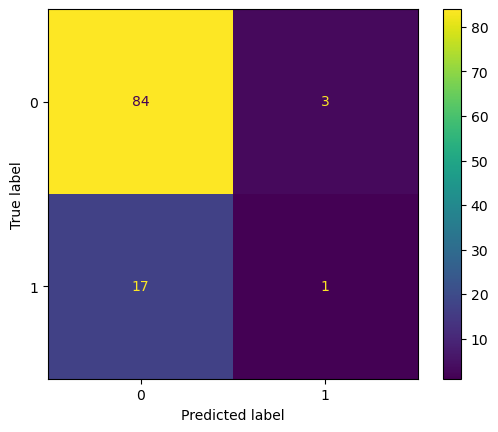

In [344]:
X_train7, X_test7, y_train7, y_test7 = train_test_split(x, y7, 
                                                        test_size = 0.3, random_state = 7)
rfc7 = RandomForestClassifier(n_estimators = 10, random_state = 7)
rfc7.fit(X_train7, y_train7)
y_pred_rfc7 = rfc7.predict(X_test7)
print("Train data accuracy:",accuracy_score(y_true = y_train7, y_pred = rfc7.predict(X_train7)))
print("Test data accuracy:",accuracy_score(y_true = y_test7, y_pred = y_pred_rfc7))
confusion_matrix_rfc7 = metrics.confusion_matrix(y_test7, y_pred_rfc7)
cm_display_rfc7 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rfc7)
cm_display_rfc7.plot()
acc_rfc7 = metrics.accuracy_score(y_test7, y_pred_rfc7)
print('accuracy', acc_rfc4)
pre_rfc7 = metrics.precision_score(y_test7, y_pred_rfc7, average = None)
print('precision', pre_rfc7)
senrec_rfc7 = metrics.recall_score(y_test7, y_pred_rfc7, average = None)
print('sensitivity recall', senrec_rfc7)
f1_rfc7 = metrics.f1_score(y_test7, y_pred_rfc7, average = None)
print('f1 score', f1_rfc7)

Train data accuracy: 0.9755102040816327
Test data accuracy: 0.6476190476190476
accuracy 0.7727272727272727
precision [0.3125     0.70786517]
sensitivity recall [0.16129032 0.85135135]
f1 score [0.21276596 0.77300613]


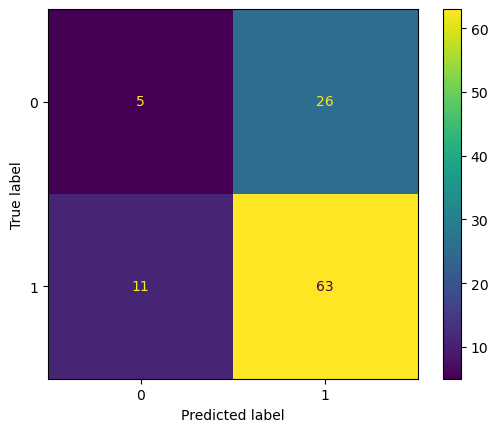

In [345]:
X_train8, X_test8, y_train8, y_test8 = train_test_split(x, y8, 
                                                        test_size = 0.3, random_state = 8)
rfc8 = RandomForestClassifier(n_estimators = 10, random_state = 8)
rfc8.fit(X_train8, y_train8)
y_pred_rfc8 = rfc8.predict(X_test8)
print("Train data accuracy:",accuracy_score(y_true = y_train8, y_pred = rfc8.predict(X_train8)))
print("Test data accuracy:",accuracy_score(y_true = y_test8, y_pred = y_pred_rfc8))
confusion_matrix_rfc8 = metrics.confusion_matrix(y_test8, y_pred_rfc8)
cm_display_rfc8 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rfc8)
cm_display_rfc8.plot()
acc_rfc8 = metrics.accuracy_score(y_test8, y_pred_rfc8)
print('accuracy', acc_rfc4)
pre_rfc8 = metrics.precision_score(y_test8, y_pred_rfc8, average = None)
print('precision', pre_rfc8)
senrec_rfc8 = metrics.recall_score(y_test8, y_pred_rfc8, average = None)
print('sensitivity recall', senrec_rfc8)
f1_rfc8 = metrics.f1_score(y_test8, y_pred_rfc8, average = None)
print('f1 score', f1_rfc8)

Train data accuracy: 0.9877551020408163
Test data accuracy: 0.5904761904761905
accuracy 0.7727272727272727
precision [0.56060606 0.64102564]
sensitivity recall [0.7254902  0.46296296]
f1 score [0.63247863 0.53763441]


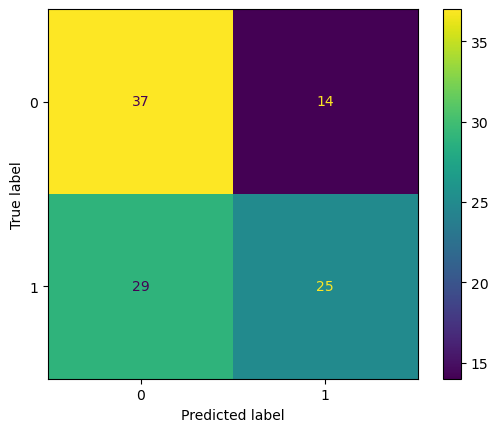

In [346]:
X_train9, X_test9, y_train9, y_test9 = train_test_split(x, y9, 
                                                        test_size = 0.3, random_state = 9)
rfc9 = RandomForestClassifier(n_estimators = 10, random_state = 9)
rfc9.fit(X_train9, y_train9)
y_pred_rfc9 = rfc9.predict(X_test9)
print("Train data accuracy:",accuracy_score(y_true = y_train9, y_pred = rfc9.predict(X_train9)))
print("Test data accuracy:",accuracy_score(y_true = y_test9, y_pred = y_pred_rfc9))
confusion_matrix_rfc9 = metrics.confusion_matrix(y_test9, y_pred_rfc9)
cm_display_rfc9 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rfc9)
cm_display_rfc9.plot()
acc_rfc9 = metrics.accuracy_score(y_test9, y_pred_rfc9)
print('accuracy', acc_rfc4)
pre_rfc9 = metrics.precision_score(y_test9, y_pred_rfc9, average = None)
print('precision', pre_rfc9)
senrec_rfc9 = metrics.recall_score(y_test9, y_pred_rfc9, average = None)
print('sensitivity recall', senrec_rfc9)
f1_rfc9 = metrics.f1_score(y_test9, y_pred_rfc9, average = None)
print('f1 score', f1_rfc9)